<a href="https://colab.research.google.com/github/ivilarasau/TFM-XAI-predicting-human-behaviour/blob/master/ML_Models_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from numpy import argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import keras
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, adam
from google.colab import files
import io

EDA steps:

*   Data Collection
*   Data Cleaning
*   Data Preprocessing
*   Data Visualisation

# ***Hunger Dataset***

Since we want the maximum amount of features that could influence individual behaviour and change the individual contribution, we will analyze the information on the *Experiment_2_time* dataset since we have information about the *hunger*, *elapsed time* between answers and *punishment* information. For that purpose we will also only work with the Public Good Games Dataset and not with the Ultimatum Game dataset.

So, here we start the ***EDA*** for the *Hunger affects social decisions in a Public Goods Game but not an Ultimatum Game* Dataset:

## ***Data Collection***

In [0]:
# Import the dataset into Google's COLAB:
uploaded = files.upload()
# Hunger:
data_ht = pd.read_csv(io.BytesIO(uploaded['Experiment_2_time.csv']))

Saving Experiment_2_time.csv to Experiment_2_time.csv


In [0]:
# Hunger dataset:
data_ht.head()

,Condition,Session,Individual,Group,Gender,BreakfastToday,BreakfastUsually,HowHungry,Q1,Q2,Q3,Q4P,Q5P,Q1NP,Q2NP,Q3NP,Contribution,Punishment Sent,Punishment Received,Initial Payoff,Final Payoff,Group Contribution,Group Share,Total Payoff,Participant Number,Punishment First,Punishment Round,Questions Correct,Punishment Questions Correct,Non Punishment Questions Correct,Trial Number,Condition Name,TimeContribution,TimePunishment
0,0,2,12,5,F,0,1,7,1,1,1,1,1,1,1,1,1,2,12,24,10,13,5,422,17,Y,Y,1.0,1.0,1.0,1,No Breakfast,26,23.0
1,0,2,12,5,F,0,1,7,1,1,1,1,1,1,1,1,5,2,0,21,19,17,6,422,17,Y,Y,1.0,1.0,1.0,2,No Breakfast,6,13.0
2,0,2,12,5,F,0,1,7,1,1,1,1,1,1,1,1,5,2,2,23,19,24,8,422,17,Y,Y,1.0,1.0,1.0,3,No Breakfast,25,26.0
3,0,2,12,5,F,0,1,7,1,1,1,1,1,1,1,1,10,4,0,21,17,31,11,422,17,Y,Y,1.0,1.0,1.0,4,No Breakfast,4,24.0
4,0,2,12,5,F,0,1,7,1,1,1,1,1,1,1,1,10,1,0,23,22,38,13,422,17,Y,Y,1.0,1.0,1.0,5,No Breakfast,6,13.0


In [0]:
data_ht.tail()

,Condition,Session,Individual,Group,Gender,BreakfastToday,BreakfastUsually,HowHungry,Q1,Q2,Q3,Q4P,Q5P,Q1NP,Q2NP,Q3NP,Contribution,Punishment Sent,Punishment Received,Initial Payoff,Final Payoff,Group Contribution,Group Share,Total Payoff,Participant Number,Punishment First,Punishment Round,Questions Correct,Punishment Questions Correct,Non Punishment Questions Correct,Trial Number,Condition Name,TimeContribution,TimePunishment
4395,1,11,36,33,M,1,1,6,0,0,0,1,1,1,0,0,0,NaN,NaN,NaN,24,11,4,368,132,Y,N,0.375,1.0,0.166667,16,Breakfast,2,NaN
4396,1,11,36,33,M,1,1,6,0,0,0,1,1,1,0,0,1,NaN,NaN,NaN,26,19,7,368,132,Y,N,0.375,1.0,0.166667,17,Breakfast,3,NaN
4397,1,11,36,33,M,1,1,6,0,0,0,1,1,1,0,0,1,NaN,NaN,NaN,26,19,7,368,132,Y,N,0.375,1.0,0.166667,18,Breakfast,4,NaN
4398,1,11,36,33,M,1,1,6,0,0,0,1,1,1,0,0,2,NaN,NaN,NaN,22,10,4,368,132,Y,N,0.375,1.0,0.166667,19,Breakfast,7,NaN
4399,1,11,36,33,M,1,1,6,0,0,0,1,1,1,0,0,0,NaN,NaN,NaN,24,11,4,368,132,Y,N,0.375,1.0,0.166667,20,Breakfast,3,NaN


In [0]:
data_ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Condition                         4400 non-null   int64  
 1   Session                           4400 non-null   int64  
 2   Individual                        4400 non-null   object 
 3   Group                             4400 non-null   int64  
 4   Gender                            4400 non-null   object 
 5   BreakfastToday                    4400 non-null   int64  
 6   BreakfastUsually                  4400 non-null   int64  
 7   HowHungry                         4400 non-null   int64  
 8   Q1                                4400 non-null   int64  
 9   Q2                                4400 non-null   int64  
 10  Q3                                4400 non-null   int64  
 11  Q4P                               4400 non-null   int64  
 12  Q5P   

From the previous code sections we can see that:

*   Data has object, float and integer values.
*   4 variable column have null/missing values. That is because the *N/A* rows are related to the punishment game, which was not played all the rounds. It was only played 50% of the time.


## ***Data Cleaning***

Condition                              0
Session                                0
Individual                             0
Group                                  0
Gender                                 0
BreakfastToday                         0
BreakfastUsually                       0
HowHungry                              0
Q1                                     0
Q2                                     0
Q3                                     0
Q4P                                    0
Q5P                                    0
Q1NP                                   0
Q2NP                                   0
Q3NP                                   0
Contribution                           0
Punishment Sent                     1320
Punishment Received                 1320
Initial Payoff                      1320
Final Payoff                           0
Group Contribution                     0
Group Share                            0
Total Payoff                           0
Participant Numb

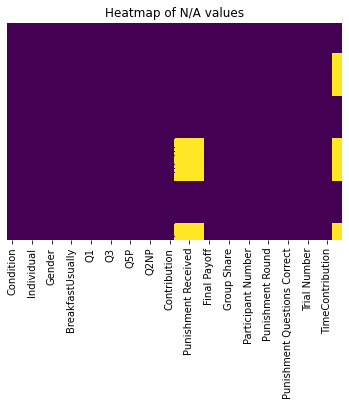

In [0]:
# Closer look to the N/A values:
print(data_ht.isnull().sum())

# Heatmap of N/A values:
sns.heatmap(data_ht.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.title('Heatmap of N/A values')
plt.show()

Apparently we have NaN values on the following columns:

*   *Punishment Sent*
*   *Punishment Received*
*   *Initial Payoff*
*   *Time Punishment*

This is actually what was supposed to happen because there were two different game approaches. One was a punishing game and the other one did not have that part. 
In order to deal with the missing data we will instert a constant value on those columns in order to be able to separate both games. We will separate them using the information of the *Puinshment Round* column, the column that gives us the information if that round was the punishment game or not.

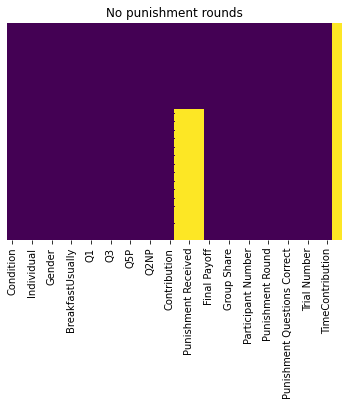

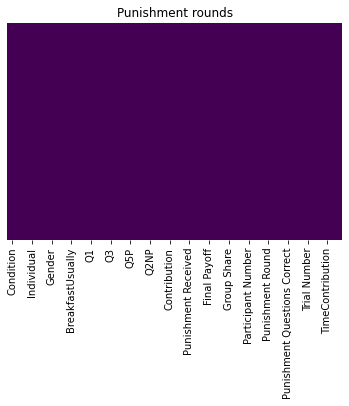

In [0]:
# Fix the NaN values:
# This fills all the null values with 0.
data_punish = data_ht[data_ht['Punishment Round']=="Y"]

data_n_punish = data_ht[data_ht['Punishment Round']=="N"]

# Let's check that now there are no 
sns.heatmap(data_n_punish.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.title('No punishment rounds')
plt.show()

sns.heatmap(data_punish.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.title('Punishment rounds')
plt.show()

Then, for the no punishment dataset we will proceed to delete the columns with NA values.

In [0]:
data_n_punish = data_n_punish.drop(columns=['Punishment Sent', 'Punishment Received', 'Initial Payoff', 'TimePunishment'])

In [0]:
print(data_n_punish.info())

print(data_punish.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 10 to 4399
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Condition                         2200 non-null   int64  
 1   Session                           2200 non-null   int64  
 2   Individual                        2200 non-null   object 
 3   Group                             2200 non-null   int64  
 4   Gender                            2200 non-null   object 
 5   BreakfastToday                    2200 non-null   int64  
 6   BreakfastUsually                  2200 non-null   int64  
 7   HowHungry                         2200 non-null   int64  
 8   Q1                                2200 non-null   int64  
 9   Q2                                2200 non-null   int64  
 10  Q3                                2200 non-null   int64  
 11  Q4P                               2200 non-null   int64  
 12  Q5P  

So, as whom may see now, we have no more null values on our features and we can proceed to *Data Preprocessing*.

## ***Data Preprocessing* & *Data Visualization***

We may now see the principal characteristics of the features from both datasets.

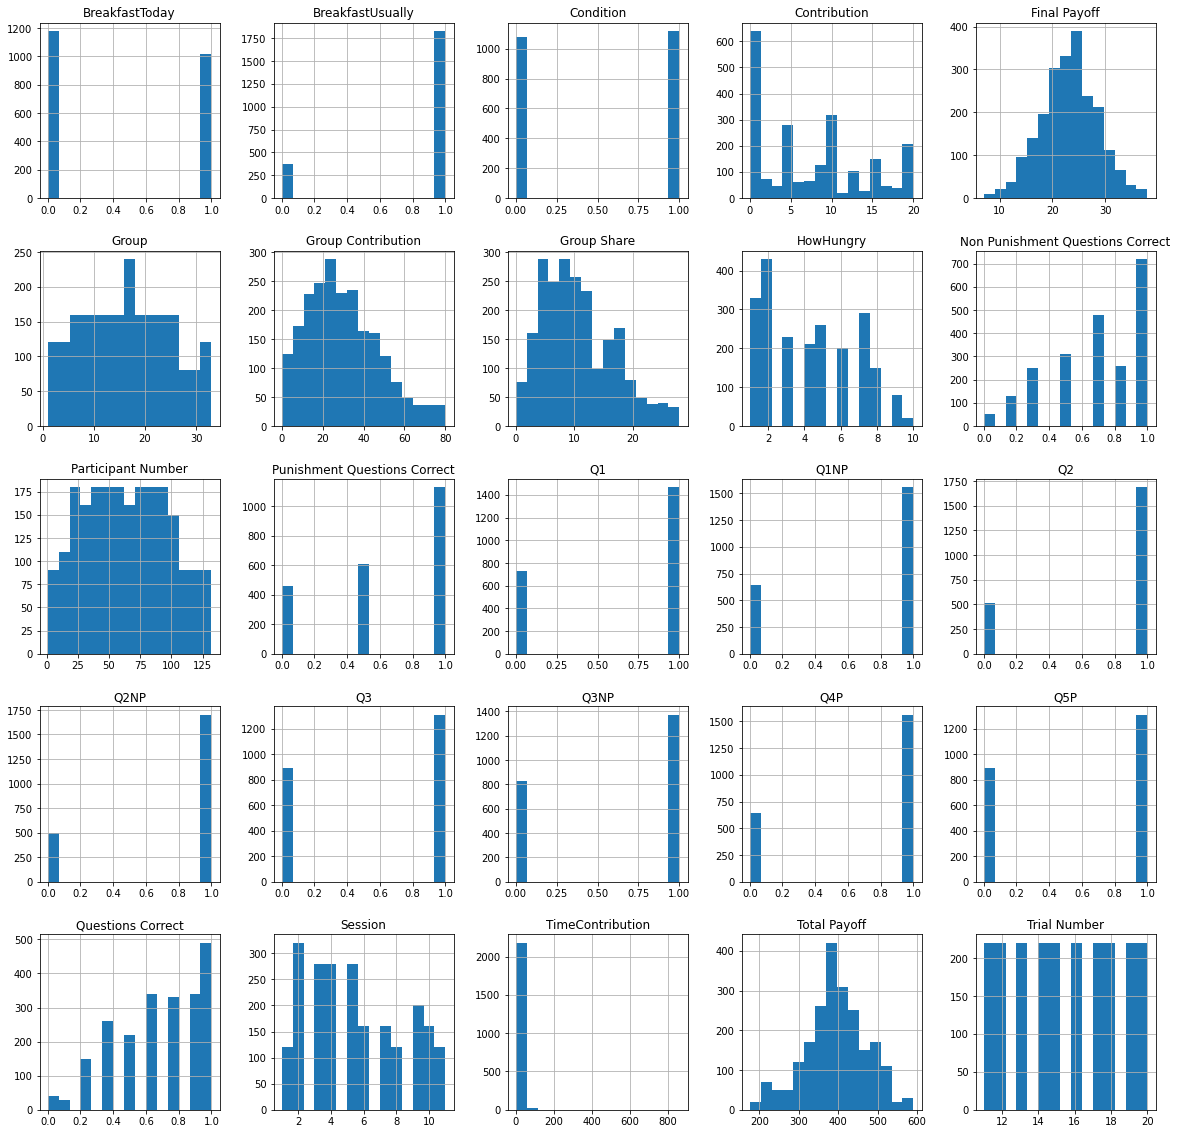

In [0]:
# Histograms for each variable for No Punishment:
hist = data_n_punish.hist(bins=15,figsize =(20,20))

In [0]:
# Summary stats table for our hunger no punishment dataframe:
data_n_punish.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Condition,2200.0,0.509091,0.500031,0.0,0.0,1.000000,1.000,1.0
Session,2200.0,5.400000,2.958559,1.0,3.0,5.000000,8.000,11.0
Group,2200.0,16.400000,8.430439,1.0,9.0,16.000000,23.000,33.0
BreakfastToday,2200.0,0.463636,0.498789,0.0,0.0,0.000000,1.000,1.0
BreakfastUsually,2200.0,0.831818,0.374113,0.0,1.0,1.000000,1.000,1.0
HowHungry,2200.0,4.259091,2.483444,1.0,2.0,4.000000,6.000,10.0
Q1,2200.0,0.668182,0.470973,0.0,0.0,1.000000,1.000,1.0
Q2,2200.0,0.768182,0.422089,0.0,1.0,1.000000,1.000,1.0
Q3,2200.0,0.595455,0.490915,0.0,0.0,1.000000,1.000,1.0
Q4P,2200.0,0.709091,0.454285,0.0,0.0,1.000000,1.000,1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

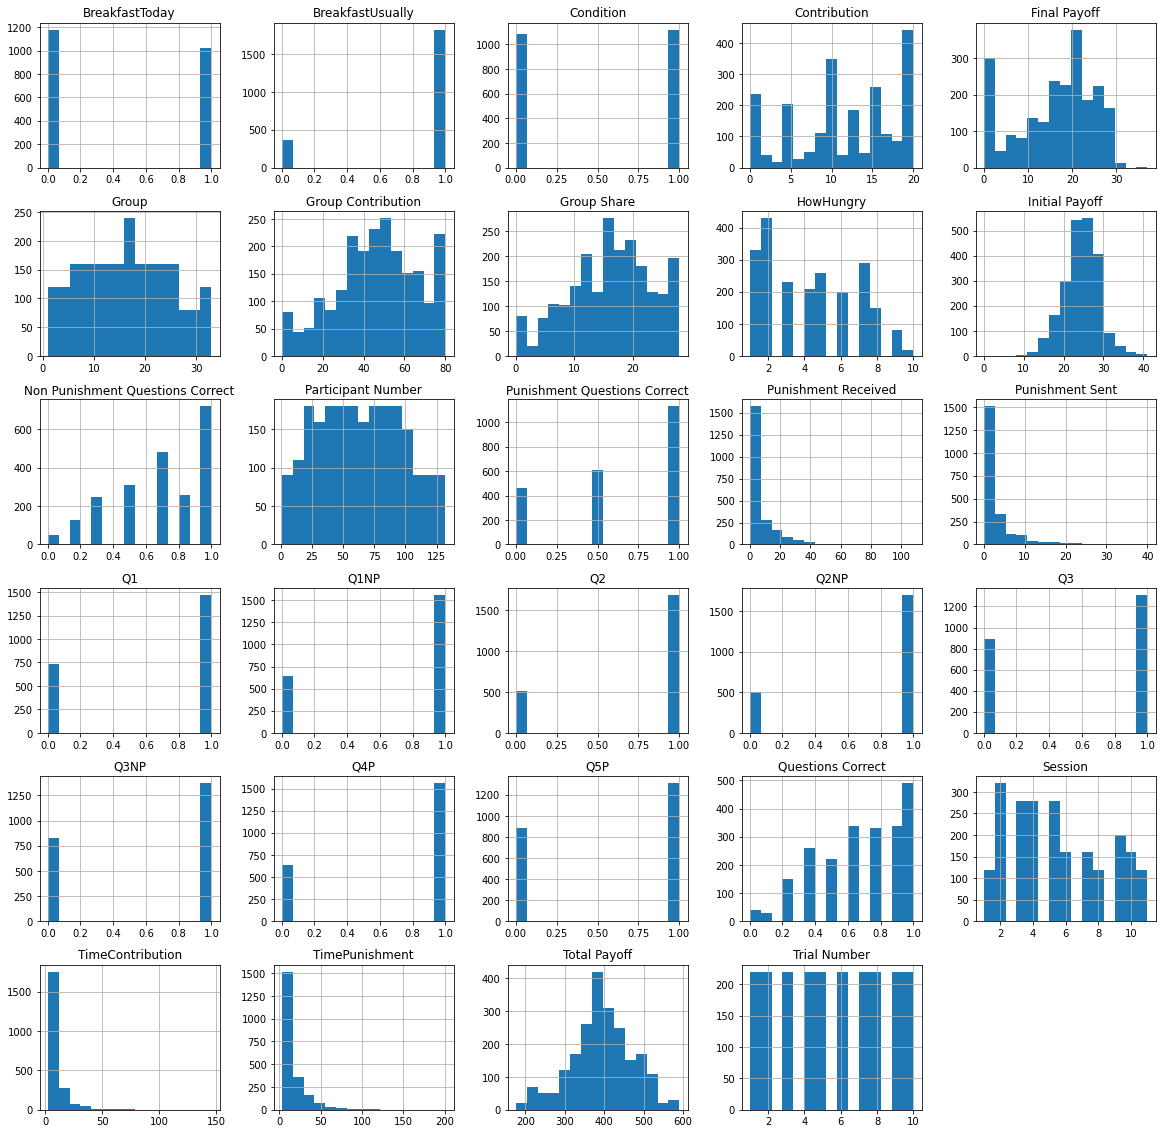

In [0]:
# Histograms for each variable for Punishment:
data_punish['Initial Payoff'] = data_punish['Initial Payoff'].astype('int')
data_punish['Punishment Sent'] = data_punish['Punishment Sent'].astype('int')
data_punish['Punishment Received'] = data_punish['Punishment Received'].astype('int')
hist = data_punish.hist(bins=15,figsize =(20,20))

In [0]:
# Summary stats table for our hunger punishment dataframe:
data_punish.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Condition,2200.0,0.509091,0.500031,0.0,0.0,1.000000,1.000,1.0
Session,2200.0,5.400000,2.958559,1.0,3.0,5.000000,8.000,11.0
Group,2200.0,16.400000,8.430439,1.0,9.0,16.000000,23.000,33.0
BreakfastToday,2200.0,0.463636,0.498789,0.0,0.0,0.000000,1.000,1.0
BreakfastUsually,2200.0,0.831818,0.374113,0.0,1.0,1.000000,1.000,1.0
HowHungry,2200.0,4.259091,2.483444,1.0,2.0,4.000000,6.000,10.0
Q1,2200.0,0.668182,0.470973,0.0,0.0,1.000000,1.000,1.0
Q2,2200.0,0.768182,0.422089,0.0,1.0,1.000000,1.000,1.0
Q3,2200.0,0.595455,0.490915,0.0,0.0,1.000000,1.000,1.0
Q4P,2200.0,0.709091,0.454285,0.0,0.0,1.000000,1.000,1.0


From the previous histograms, characteristics and from the relevant information extracted from the original paper, *Hunger affects social decisions in a multi-round Public Goods
Game but not a single-shot Ultimatum Game* we may see which are the relevant features and the ones that will help us to study the individual behaviour. So, now we may transform our dataframes to include only the relevant features.

We will thus focus on hunger, amount contributed, punishments, payoffs, and time. One relevant thing that we wanted to highlight was that the we will measure the hunger with the scale (1-10) from the column *How hunger*, instead of the method used on the paper (Breakfast-NoBreakfast). That is beacause we think that it gives a more accurate vision of the real hunger status of each participant.

In [0]:
# PUNISHMENT - Relevant features:
data_punish = data_punish[["HowHungry", "Punishment Round", "Contribution", "Punishment Sent",
                           "Punishment Received", "Group Share", "Initial Payoff", "Final Payoff",  "Total Payoff",
                           "TimeContribution", "TimePunishment"]]

# NO PUNISHMENT - Relevant Features:
data_n_punish = data_n_punish[["HowHungry", "Punishment Round", "Contribution", "Group Share", "Final Payoff",
                            "Total Payoff", "TimeContribution"]]

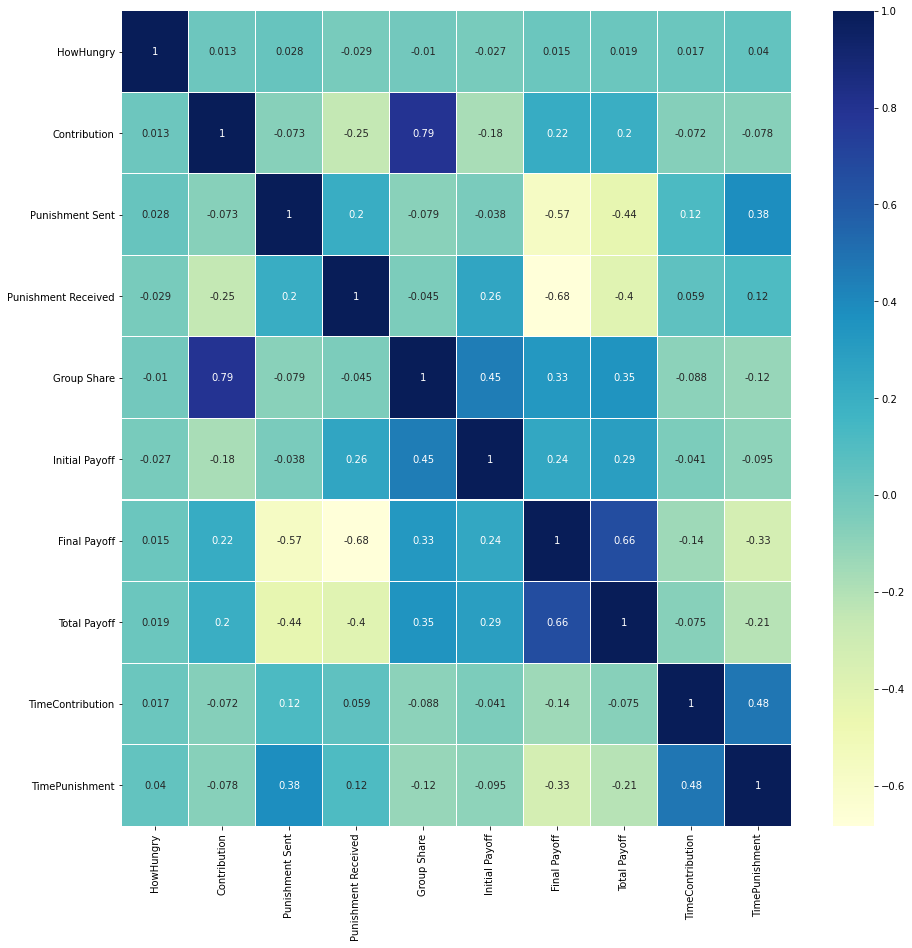

In [0]:
# Correlation matrix heat map for punishment dataframe:
plt.figure(figsize=(15,15))
sns.heatmap(data_punish.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

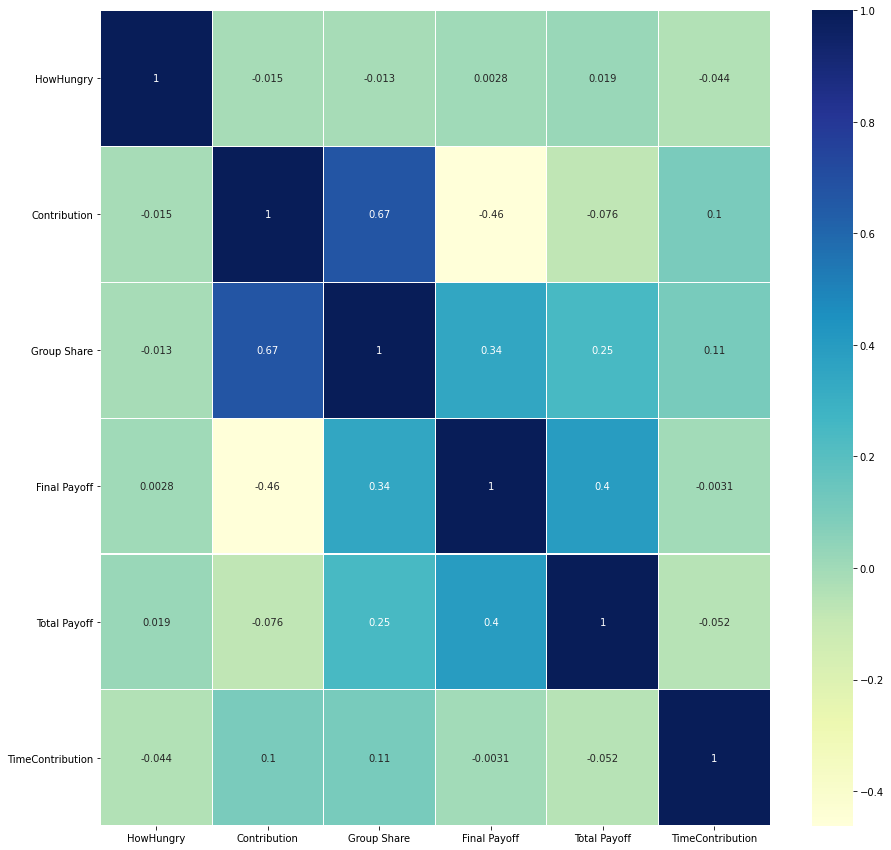

In [0]:
# Correlation matrix heat map for non-punishment dataframe:
plt.figure(figsize=(15,15))
sns.heatmap(data_n_punish.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

From that heatmap we can see that there might be a correlation beteeen some features, but we cannot clearly consider which features and how they could influence individual's behaviour.

Then, we will study in more detal the principal features of this dataset which are Punishment and Hunger on new datasets.

In [0]:
grouped_breakfast_punish = data_punish.groupby(["HowHungry"])
grouped_breakfast_n_punish = data_n_punish.groupby(["HowHungry"])
# Complete dataframe:
data_ht = data_ht[["HowHungry", "Punishment Round", "Contribution", "Punishment Sent",
                           "Punishment Received", "Group Share", "Initial Payoff", "Final Payoff",  "Total Payoff",
                           "TimeContribution", "TimePunishment"]]
grouped_punishment = data_ht.groupby(['Punishment Round'])

In [0]:
# NO PUNISHMENT - Breakfast:
grouped_breakfast_n_punish.aggregate([np.mean, np.median, np.var])

Contribution                    ... TimeContribution                    
                  mean median        var  ...             mean median          var
HowHungry                                 ...                                     
1             8.057576    8.0  42.802146  ...         9.230303    5.0   104.080538
2             7.176744    5.0  46.532791  ...        11.767442    5.0  2105.666070
3             7.391304    7.0  39.042719  ...         8.608696    5.0   111.732675
4             6.976190    6.0  42.913306  ...         7.823810    5.0    77.686512
5             7.511538    7.0  34.945812  ...         9.407692    5.0   308.674844
6             8.505000   10.0  53.798970  ...         7.820000    5.0    53.243819
7             7.258621    6.0  41.597244  ...         6.831034    5.0    39.061317
8             7.486667    5.0  50.681029  ...         8.226667    4.5    86.605996
9             6.762500    7.5  25.525158  ...         9.250000    6.0    95.126582
10            6.050000    4.5  31.207895  ...         7.450000    5.5    24.365789

[10 rows x 15 columns]

From this table whom may see that *Hunger* is a relevant feature. The contributions, total payoff and final payoff differ from the total mean of those features wich are 7.48, 23.14 and 393.46 respectively.
And we may also see that the elapsed time is also bigger than the total mean (9.01) on those participants have values between 1-5 on *How hungry*.

On the NO PUNISHMENT GAME, the *hunger* participants took less time to participate, had a lower final payoff and contributed less.

In [0]:
# Punishment - Breakfast:
grouped_breakfast_punish.aggregate([np.mean, np.median, np.var])

Contribution                    ... TimePunishment                   
                  mean median        var  ...           mean median         var
HowHungry                                 ...                                  
1            10.693939   10.0  47.313337  ...      16.575758   11.0  355.637100
2            11.572093   12.0  43.084534  ...      16.679070   10.0  313.272055
3            12.026087   12.0  36.671806  ...      16.821739   10.0  274.531403
4            12.204762   12.0  37.120551  ...      14.552381   10.0  148.277147
5            11.750000   11.0  31.948842  ...      19.092308   12.0  328.748203
6            12.465000   15.0  41.003794  ...      16.660000   12.0  174.728040
7            11.686207   13.0  45.918494  ...      17.548276   12.0  254.539184
8            10.406667   10.0  37.424116  ...      19.313333   10.0  559.464922
9            11.875000   12.0  34.262658  ...      18.300000   11.5  297.225316
10            9.700000    9.5  26.326316  ...      19.350000   14.5  186.660526

[10 rows x 27 columns]

From the Punishment game table, whom may see that *Hunger* is also relevant feature. The individual contributions', total payoff, final payoff and punishment sent and recieved differ from the total mean of those features wich are 11.58, 16.20, 393.46, 2.72 and 6.83 respectively.
And we may also see that the elapsed punishment time is also bigger than the total mean (17.13) on those participants have values between 1-5 on *How hungry*.

On the NO PUNISHMENT GAME, the *hunger* participants took greater time to participate, contributed less, punished more, recieved less punishment and had lower payoffs.

In [0]:
#PUNISHMENT - Relevance Features (No individual group studies): - Interesting Results:
grouped_punishment.aggregate([np.mean, np.median, np.var])

HowHungry                   ... TimePunishment                  
                      mean median       var  ...           mean median        var
Punishment Round                             ...                                 
N                 4.259091      4  6.167493  ...            NaN    NaN        NaN
Y                 4.259091      4  6.167493  ...      17.136364   11.0  296.83815

[2 rows x 21 columns]

Finally, we analyzed the Punishment effect.
From the previous table whom may see that the contribution and grop share were 4 points and 6 points bigger during Punishment rounds than in no Punishment rounds, but the Final Payoff was greater on the no-punishment rounds. The elapsed time was also bigger, consistent with a greater amount of time needed to think on the answer. 

So, as we have seen on these visualizations, punishment creates the contrary effect of hunger.

We may now confirm our theory with a feature importance analysis on the features analyzed before.

In [0]:
data_punish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 4389
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HowHungry            2200 non-null   int64  
 1   Punishment Round     2200 non-null   object 
 2   Contribution         2200 non-null   int64  
 3   Punishment Sent      2200 non-null   int64  
 4   Punishment Received  2200 non-null   int64  
 5   Group Share          2200 non-null   int64  
 6   Initial Payoff       2200 non-null   int64  
 7   Final Payoff         2200 non-null   int64  
 8   Total Payoff         2200 non-null   int64  
 9   TimeContribution     2200 non-null   int64  
 10  TimePunishment       2200 non-null   float64
dtypes: float64(1), int64(9), object(1)
memory usage: 286.2+ KB


Coefficient of determination: 0.06664949336186643
Feature: 0, Score: 0.02111
Feature: 1, Score: -0.01097
Feature: 2, Score: -0.14060
Feature: 3, Score: -0.02386
Feature: 4, Score: -0.00962


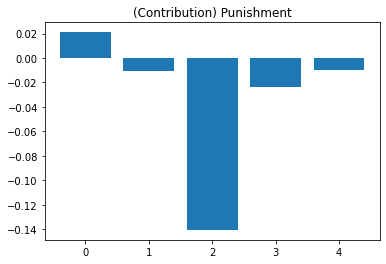

Coefficient of determination: 0.1758818386611437
Feature: 0, Score: 0.03616
Feature: 1, Score: 0.07156
Feature: 2, Score: -0.03232
Feature: 3, Score: 0.11174


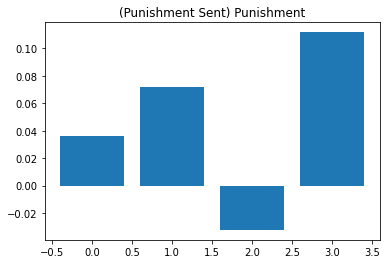

Coefficient of determination: 0.04509846316799748
Feature: 0, Score: -0.16027
Feature: 1, Score: 0.43115
Feature: 2, Score: 0.01712
Feature: 3, Score: 0.02374


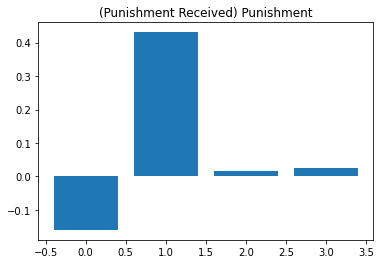

Coefficient of determination: 0.017467625887534033
Feature: 0, Score: -0.01828
Feature: 1, Score: -0.01997
Feature: 2, Score: -0.02239
Feature: 3, Score: -0.04208


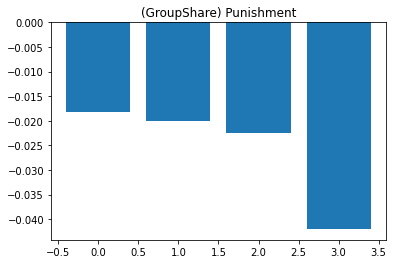

In [0]:
# Feature Importance - Linear Regression (Individual Contribution) Punishment:
from sklearn.linear_model import LinearRegression
# define dataset
array = data_punish.values
X = array[:,[0,3,4,9,10]] # Hunger, Punishment sent/received and Time Elapsed
y = array[:,2] # Contribution
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('(Contribution) Punishment')
plt.show()

X = array[:,[0,4,9,10]] # Hunger, Punishment received and Time Elapsed
y = array[:,3] # Punishment sent
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('(Punishment Sent) Punishment')
plt.show()

X = array[:,[0,3,9,10]] # Hunger, Punishment sent and Time Elapsed
y = array[:,4] # Punishment Received
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('(Punishment Received) Punishment')
plt.show()

X = array[:,[0,4,9,10]] # Hunger, Punishment received and Time Elapsed
y = array[:,5] # GroupShare
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('(GroupShare) Punishment')
plt.show()

From the previous feature importance analysis made with a linear regression, whom may see that there are no clear linear correlations with the features. However we may see that with a first linear approximation which of the features play a more important role on the contribution of an individual which are the amount of punishment received and the hunger and the most important features on the groupshare and payment sent/received are the time features.
So, the amount of punishment that an individual may receive is a fear factor that could be related (not linearly) to a greater amount contributed to the common benefit.
We will have to study the features in much more detail on the next section.

# ***Large Scale and Information Dataset***

Here we start the ***EDA*** for the *Large scale and information effects on cooperation in public good games* Dataset:

## ***Data Collection***

In [310]:
# Large size and information effects:
uploaded = files.upload()
data_li = pd.read_csv(io.BytesIO(uploaded['2017A2ECOCOOPANSA01ONL0000ESPMAD.csv']))

Saving 2017A2ECOCOOPANSA01ONL0000ESPMAD.csv to 2017A2ECOCOOPANSA01ONL0000ESPMAD (16).csv


In [0]:
# Large size and information effects - Dataframe:
data_li.head()

,participant_id,player_alive,group_avg_contribution,player_contribution,round_number,gender,age,treatment
0,1.0,1.0,4.78,6.0,1.0,F,32.0,PGG100
1,2.0,1.0,4.78,6.0,1.0,M,19.0,PGG100
2,3.0,1.0,4.78,6.0,1.0,M,32.0,PGG100
3,4.0,1.0,4.78,10.0,1.0,M,20.0,PGG100
4,5.0,1.0,4.78,6.0,1.0,NaN,NaN,PGG100


In [0]:
data_li.tail()

,participant_id,player_alive,group_avg_contribution,player_contribution,round_number,gender,age,treatment
21190,97.0,1.0,4.6538,6.0,14.0,M,36.0,PGG_H2
21191,98.0,1.0,4.6538,2.0,14.0,M,42.0,PGG_H2
21192,99.0,1.0,4.6538,0.0,14.0,M,25.0,PGG_H2
21193,100.0,1.0,4.6538,0.0,14.0,F,50.0,PGG_H2
21194,101.0,1.0,4.6538,10.0,14.0,M,20.0,PGG_H2


In [0]:
data_li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21195 entries, 0 to 21194
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          21112 non-null  float64
 1   player_alive            21112 non-null  float64
 2   group_avg_contribution  21112 non-null  float64
 3   player_contribution     21112 non-null  float64
 4   round_number            21112 non-null  float64
 5   gender                  20874 non-null  object 
 6   age                     20874 non-null  float64
 7   treatment               21112 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.3+ MB


In [0]:
data_li['player_alive'].unique()

array([ 1.,  0., nan])

From these sections above whom may see that there are some null values on *gender* and *age* columns. Some of that values are due to the dropouts, but not all of them.
The column *player alive* gives us information if the player ended the game or if the player dropout.

On this sense, we will only eliminate all the players that did not conclude the game, because they might not be committed to the game. However, we will keep the participants that did not give personal information, because they also participate on the game and some interesting features may be observed from them. And thus we are analzing the dataset to find interesting patterns around their contribution's behavior related to the *large scale and information* features.

## ***Data Cleaning***

In [0]:
# We will eliminate all the rounds played by the participants that dropout:
dropouts = list(set(data_li['participant_id'][data_li.player_alive==0.0]))
print(dropouts)
print(len(dropouts))

data_1 = data_li[~data_li.participant_id.isin(dropouts)]
data_n_dropouts = pd.DataFrame(data=data_1)
# Finally dropout the remaining NA values:
data_n_dropouts = data_n_dropouts.dropna()
# Final dataframe
data_n_dropouts.info()

[1.0, 513.0, 2.0, 3.0, 5.0, 6.0, 7.0, 518.0, 521.0, 522.0, 517.0, 12.0, 524.0, 9.0, 11.0, 17.0, 529.0, 532.0, 4.0, 534.0, 535.0, 22.0, 537.0, 26.0, 539.0, 27.0, 541.0, 29.0, 31.0, 32.0, 33.0, 545.0, 30.0, 28.0, 37.0, 550.0, 38.0, 40.0, 42.0, 43.0, 44.0, 555.0, 46.0, 558.0, 559.0, 49.0, 554.0, 48.0, 51.0, 53.0, 566.0, 55.0, 54.0, 57.0, 569.0, 59.0, 572.0, 573.0, 62.0, 63.0, 576.0, 577.0, 578.0, 67.0, 68.0, 60.0, 582.0, 66.0, 72.0, 71.0, 74.0, 75.0, 78.0, 79.0, 80.0, 82.0, 85.0, 86.0, 88.0, 89.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 20.0, 615.0, 105.0, 617.0, 619.0, 21.0, 109.0, 621.0, 623.0, 626.0, 627.0, 629.0, 633.0, 634.0, 637.0, 638.0, 25.0, 640.0, 643.0, 647.0, 657.0, 146.0, 661.0, 663.0, 664.0, 665.0, 154.0, 666.0, 668.0, 669.0, 672.0, 164.0, 167.0, 680.0, 682.0, 685.0, 173.0, 687.0, 182.0, 189.0, 701.0, 703.0, 704.0, 191.0, 702.0, 710.0, 711.0, 713.0, 716.0, 717.0, 718.0, 207.0, 719.0, 209.0, 722.0, 723.0, 212.0, 215.0, 730.0, 731.0, 733.0, 736.0, 225.0, 737.0, 7

## ***Data Preprocessing* & *Data Visualization***

We will start with the preprocessing grouping the information about each round in order to compare the information and conlclusions extracted about the original paper *Large scale and information effects on cooperation in public good games* to extract further conclusions.

In [0]:
data_n_dropouts["round_number"] = data_n_dropouts.round_number.astype('category')
data_n_dropouts["player_alive"] = data_n_dropouts.player_alive.astype('category')
data_n_dropouts["participant_id"] = data_n_dropouts.participant_id.astype('category')

data_n_dropouts.aggregate([np.mean, np.median, np.var])

,group_avg_contribution,player_contribution,age
mean,4.862122,4.927824,30.606977
median,4.720000,4.000000,27.000000
var,0.333626,10.560701,105.277533


In [0]:
# Grouping by round:
grouped_round = data_n_dropouts.groupby(["round_number"])

In [0]:
grouped_round.aggregate([np.mean, np.median, np.var])

group_avg_contribution         ...    age            
                               mean median  ... median         var
round_number                                ...                   
1.0                        4.562272   4.53  ...   27.0  105.391337
2.0                        5.415084   5.41  ...   27.0  105.391337
3.0                        5.583116   5.54  ...   27.0  105.391337
4.0                        5.290763   5.20  ...   27.0  105.391337
5.0                        4.988656   4.81  ...   27.0  105.391337
6.0                        4.922242   4.72  ...   27.0  105.391337
7.0                        4.866574   4.67  ...   27.0  105.391337
8.0                        4.969742   4.76  ...   27.0  105.391337
9.0                        4.921822   4.74  ...   27.0  105.391337
10.0                       4.629953   4.41  ...   27.0  105.391337
11.0                       4.549170   4.33  ...   27.0  105.391337
12.0                       4.576419   4.35  ...   27.0  105.391337
13.0                       4.400010   4.18  ...   27.0  105.391337
14.0                       4.393887   4.25  ...   27.0  105.391337

[14 rows x 9 columns]

From the previous table we may see that the *group_avg_contribution* reduces when the nº of rounds is decreasing, *player_contribution* is also decreasing and it had its peak on mid rounds, but on average, the contribution is constant with +-0.75 in comparison with the mean values of the whole group.

Now we will focus on the large scale and information features specifically, after we checked the general behaviour:

In [0]:
# Grouping by Treatment:
grouped_li = data_n_dropouts.groupby(['treatment'])

In [0]:
grouped_li.aggregate([np.mean, np.median, np.var])

group_avg_contribution           ...    age            
                            mean   median  ... median         var
treatment                                  ...                   
PGG100                  4.707857  4.63500  ...   28.0   52.151950
PGG1000                 4.707143  4.69500  ...   27.0   99.082158
PGG_H                   6.008536  5.92500  ...   29.0  160.209407
PGG_H2                  5.412257  5.32080  ...   22.0  140.904703
PGG_HM                  6.088286  6.24000  ...   31.0  112.978323
PGG_HM2                 5.126864  5.18295  ...   25.0  148.299387

[6 rows x 9 columns]

From the previous table whom may see that the size of the groups has influence only on the games where some information was given to the participants (*H* and *HM*).

Whom may also see that the greater difference is between the information treatments and the no-information treatments.
It may be seen that that the individual player contribution and group average contribution increases more than 20%.

To sum up, when some information is given to the participants, if we then increase the nº of participants, group size is also an important feature.

So, from now on we will classify the data between the games *PGG_100* and *PGG_1000* and the other four; *PGG_HM*, *PGG_HM2*, *PGG_H*, *PGG_H2*.

In [0]:
# Information datasets:
data_HM = data_n_dropouts[data_n_dropouts['treatment'].isin(['PGG_HM', 'PGG_HM2', 'PGG_H', 'PGG_H2'])]
data_100 = data_n_dropouts[data_n_dropouts['treatment'].isin(['PGG100', 'PGG1000'])]

We will now apply two feature importance (liniar regression) algorithms to further understand the impact that features have on the player's individual contribution.

In [0]:
data_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 7 to 15482
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   participant_id          10080 non-null  category
 1   player_alive            10080 non-null  category
 2   group_avg_contribution  10080 non-null  float64 
 3   player_contribution     10080 non-null  float64 
 4   round_number            10080 non-null  category
 5   gender                  10080 non-null  object  
 6   age                     10080 non-null  float64 
 7   treatment               10080 non-null  object  
dtypes: category(3), float64(3), object(2)
memory usage: 538.1+ KB


Coefficient of determination: 0.061222801240919174
Feature: 0, Score: 0.99373
Feature: 1, Score: -0.00730
Feature: 2, Score: 0.06663


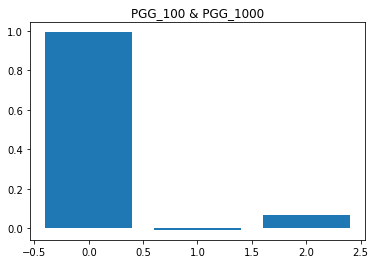

Coefficient of determination: 0.03241694644088733
Feature: 0, Score: 0.92802
Feature: 1, Score: 0.00392
Feature: 2, Score: 0.00278


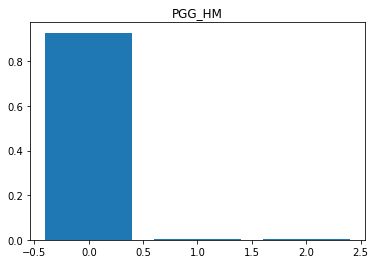

In [0]:
# Feature Importance - Linear Regression (Treatment):
from sklearn.linear_model import LinearRegression

# PGG_100 & PGG_1000 - Feature Importance on Player Contribution:
array = data_100.values
X = array[:,[2,4,6]] #group_avg, round_number, age
y = array[:,3]
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('PGG_100 & PGG_1000')
plt.show()

# PGG_HM - Feature Importance on Player Contribution:
array = data_HM.values
X = array[:,[2,4,6]] #group_avg, round_number, age
y = array[:,3]
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('PGG_HM')
plt.show()

From these analysis, whom may see that there is no linear relation between the variables studied. However we can see that the impact of group average contribution is greater on the PGG_100(0) dataset, because on the PGG_HM the importance of a larger group of participants decreased the player's individual contribution in accordance with the previous results observed.

We next analyze the feature importance using a Tree Classifier and PCA algorithms on the *Treatment* feature.

In [0]:
data_n_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12040 entries, 7 to 21194
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   participant_id          12040 non-null  category
 1   player_alive            12040 non-null  category
 2   group_avg_contribution  12040 non-null  float64 
 3   player_contribution     12040 non-null  float64 
 4   round_number            12040 non-null  category
 5   gender                  12040 non-null  object  
 6   age                     12040 non-null  float64 
 7   treatment               12040 non-null  object  
dtypes: category(3), float64(3), object(2)
memory usage: 957.6+ KB


In [0]:
# Feature Selection - ExtraTreesClassifier:
from sklearn.ensemble import ExtraTreesClassifier
# load data
data_n_dropouts["round_number"] = data_n_dropouts.round_number.astype('category')
array = data_n_dropouts.values
X = array[:,[2,3,4,6]] #group_avg, player_contr, round_number, age
y = array[:,7]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
print(model.feature_importances_)

Coefficient of determination: 0.9972591362126246
[0.68080195 0.02110399 0.25383339 0.04426067]


In [0]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA
# load data
X = array[:,[2,3,4,6]]
y = array[:,7]
# feature extraction
pca = PCA(n_components=4)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.7977092  0.12481654 0.07554192 0.00193235]
[[ 3.12761275e-03  6.11498124e-02 -8.09588736e-04  9.98123371e-01]
 [-6.73756252e-02 -1.78463621e-01  9.81564403e-01  1.19408138e-02]
 [-1.70628652e-02 -9.81615206e-01 -1.80374531e-01  6.00456059e-02]
 [ 9.97576865e-01 -2.90348743e-02  6.32115112e-02 -1.29581344e-03]]


The results obtained are not surpising at all and are in corcondance with all the previous conclusions. From the classification of the random forest we can clearly see with a great correlation coefficinet that there is a clear relation between the group average contribution and individual contribution depending on the information gave to the participants on each game.

So, information is clearly an important feature on the individual's behaviour, but if when some information is given to the participants we also increase the nº of participants, then group size also becomes an important feature.

# ***Voting Dataset***

Here we start the ***EDA*** for the *Voting on the threat of exclusion in a public goods experiment* Dataset.
We may say that we only collected the information about the first experiment, the stacked results from the 8 sessions run in June 2016 (endogenous treatments). That's because as it has been stated on the original paper, *that contribution rates are very similar in the endogenous treatments and the exogenous treatments. Contributions in the B game are slightly higher in the endogenous treatments than in the exogenous treatments in both B10 and B8*. So, we may find more interesting results regarding individual behaviour on the endogeneous treatment.

## ***Data Collection***

In [0]:
# Voting:
uploaded = files.upload()
data_v = pd.read_excel(io.BytesIO(uploaded['Results_June16.xlsx']))

Saving Results_June16.xlsx to Results_June16.xlsx


In [0]:
# Voting Dataframe:
data_v.head()

,round,session,id,groupid,treatment,SessionID,TreatmentNumber,subjects,Period,Subject,Group,Profit,TotalProfit,Participate,GroupSize,NumSubjects,NumGroups,Factor,EndowmentA,EndowmentB,CurrencyFactor,CurrGroupSize,VoteGame,SumGV,ResGV,Contribution1,Contribution2,Contribution3,Contribution4,Contribution5,SumOfContributions1,SumOfContributions2,SumOfContributions3,SumOfContributions4,SumOfContributions5,Profit1,Profit2,Profit3,Profit4,Profit5,...,Ties[3],Ties[4],Ties[5],Rrank1,Rrank2,Rrank3,Rrank4,Rrank5,Rid[1],Rid[2],Rid[3],Rid[4],Rid[5],y_1,y_2,y_3,y_4,y_5,p[1],p[2],p[3],p[4],p[5],p_sum,TimeWeiterGameABOK,TimeWeiterContribution1OK,TimeWeiterResult1OK,TimeWeiterResult11OK,TimeWeiterContribution2OK,TimeWeiterResult2OK,TimeWeiterResult21OK,TimeWeiterContribution3OK,TimeWeiterResult3OK,TimeWeiterResult31OK,TimeWeiterContribution4OK,TimeWeiterResult4OK,TimeWeiterResult41OK,TimeWeiterContribution5OK,TimeWeiterResult5OK,TimeWeiterInfoTotalPayoffOK
0,1,1,1,1,1,160614_0902,3,subjects,1,1,1,81.0,81.0,0,5,30,6,0.4,10,10,0.05,4,2,8,2,5,10,10,10,0,35,40,40,40,10,19.0,16.0,16.0,16.0,14.0,...,1,1,1,1,2,2,3,4,0.850761,0.737866,0.548879,0.135602,0.058819,0,0,10,0,0,14.0,14.0,4.0,14.0,24.0,46.0,59,55,56,56,59,58,59,60,58,59,60,59,58,60,57,0
1,1,1,2,1,1,160614_0902,3,subjects,1,2,1,76.0,76.0,0,5,30,6,0.4,10,10,0.05,4,2,8,2,10,10,10,10,0,35,40,40,40,10,14.0,16.0,16.0,16.0,14.0,...,1,1,1,2,1,1,2,1,0.847110,0.851049,0.563738,0.734875,0.758425,0,0,10,0,0,14.0,14.0,4.0,14.0,24.0,46.0,57,52,50,47,55,55,51,59,51,59,59,53,56,59,55,-
2,1,1,3,1,1,160614_0902,3,subjects,1,3,1,76.0,76.0,0,5,30,6,0.4,10,10,0.05,4,1,8,2,10,10,10,10,0,35,40,40,40,10,14.0,16.0,16.0,16.0,14.0,...,1,1,1,4,3,3,1,2,0.518049,0.695951,0.454688,0.746466,0.504430,0,0,10,0,0,14.0,14.0,4.0,14.0,24.0,46.0,58,57,53,48,59,58,60,59,55,59,58,59,59,59,54,-
3,1,1,4,1,1,160614_0902,3,subjects,1,4,1,64.0,64.0,0,5,30,6,0.4,10,10,0.05,4,1,8,2,0,-99,-99,-99,-99,35,40,40,40,10,24.0,10.0,10.0,10.0,10.0,...,1,1,1,5,5,5,5,5,0.422481,0.000000,0.000000,0.000000,0.000000,0,0,10,0,0,14.0,14.0,4.0,14.0,24.0,46.0,42,35,48,52,50,55,55,59,51,58,60,59,60,99999,59,-
4,1,1,5,1,1,160614_0902,3,subjects,1,5,1,66.0,66.0,0,5,30,6,0.4,10,10,0.05,4,2,8,2,10,10,10,10,10,35,40,40,40,10,14.0,16.0,16.0,16.0,4.0,...,1,1,1,3,4,4,4,3,0.657508,0.542935,0.176521,0.001740,0.201404,0,0,10,0,0,14.0,14.0,4.0,14.0,24.0,46.0,57,54,54,46,58,57,59,59,51,58,59,57,59,59,58,-


In [0]:
data_v.tail()

,round,session,id,groupid,treatment,SessionID,TreatmentNumber,subjects,Period,Subject,Group,Profit,TotalProfit,Participate,GroupSize,NumSubjects,NumGroups,Factor,EndowmentA,EndowmentB,CurrencyFactor,CurrGroupSize,VoteGame,SumGV,ResGV,Contribution1,Contribution2,Contribution3,Contribution4,Contribution5,SumOfContributions1,SumOfContributions2,SumOfContributions3,SumOfContributions4,SumOfContributions5,Profit1,Profit2,Profit3,Profit4,Profit5,...,Ties[3],Ties[4],Ties[5],Rrank1,Rrank2,Rrank3,Rrank4,Rrank5,Rid[1],Rid[2],Rid[3],Rid[4],Rid[5],y_1,y_2,y_3,y_4,y_5,p[1],p[2],p[3],p[4],p[5],p_sum,TimeWeiterGameABOK,TimeWeiterContribution1OK,TimeWeiterResult1OK,TimeWeiterResult11OK,TimeWeiterContribution2OK,TimeWeiterResult2OK,TimeWeiterResult21OK,TimeWeiterContribution3OK,TimeWeiterResult3OK,TimeWeiterResult31OK,TimeWeiterContribution4OK,TimeWeiterResult4OK,TimeWeiterResult41OK,TimeWeiterContribution5OK,TimeWeiterResult5OK,TimeWeiterInfoTotalPayoffOK
4595,5,8,226,46,1,160616_1537,3,subjects,4,21,5,63.2,247.6,1,5,25,5,0.4,10,10,0.05,2,2,9,2,10,10,10,10,0,48,40,29,16,0,19.2,16.0,11.6,6.4,10.0,...,1,1,1,5,4,2,1,1,0.054298,0.052439,0.759484,0.933774,0.948795,0,0,2,9,10,10.0,10.0,14.4,12.6,19.2,20.0,58,57,55,54,59,56,58,59,55,57,59,53,56,59,58,54
4596,5,8,227,46,1,160616_1537,3,subjects,4,22,5,76.8,274.2,1,5,25,5,0.4,10,10,0.05,2,2,9,2,10,10,0,-99,-99,48,40,29,16,0,19.2,16.0,21.6,10.0,10.0,...,1,1,1,1,2,1,5,5,0.952304,0.592418,0.784605,0.000000,0.000000,0,0,2,9,10,10.0,10.0,14.4,12.6,19.2,20.0,58,57,56,58,59,57,59,59,57,57,59,57,58,59,60,56
4597,5,8,228,46,1,160616_1537,3,subjects,4,23,5,69.2,277.8,1,5,25,5,0.4,10,10,0.05,2,2,9,2,10,10,10,4,0,48,40,29,16,0,19.2,16.0,11.6,12.4,10.0,...,1,1,1,2,3,3,2,2,0.919307,0.329189,0.357309,0.592961,0.266660,0,0,2,9,10,10.0,10.0,14.4,12.6,19.2,20.0,58,58,51,51,59,55,59,59,56,56,55,52,53,54,59,54
4598,5,8,229,46,1,160616_1537,3,subjects,4,24,5,61.2,273.4,1,5,25,5,0.4,10,10,0.05,2,2,9,2,8,-99,-99,-99,-99,48,40,29,16,0,21.2,10.0,10.0,10.0,10.0,...,1,1,1,4,5,5,5,5,0.191490,0.000000,0.000000,0.000000,0.000000,0,0,2,9,10,10.0,10.0,14.4,12.6,19.2,20.0,56,52,57,60,59,58,59,59,57,57,59,56,55,56,56,43
4599,5,8,230,46,1,160616_1537,3,subjects,4,25,5,72.2,291.6,1,5,25,5,0.4,10,10,0.05,2,1,9,2,10,10,9,2,-99,48,40,29,16,0,19.2,16.0,12.6,14.4,10.0,...,1,1,1,3,1,4,3,5,0.429662,0.799222,0.308967,0.427964,0.000000,0,0,2,9,10,10.0,10.0,14.4,12.6,19.2,20.0,58,49,44,49,59,50,57,51,53,51,56,47,44,59,49,44


## ***Data Cleaning***

round                          0
session                        0
id                             0
groupid                        0
treatment                      0
                              ..
TimeWeiterResult4OK            0
TimeWeiterResult41OK           0
TimeWeiterContribution5OK      0
TimeWeiterResult5OK            0
TimeWeiterInfoTotalPayoffOK    0
Length: 126, dtype: int64


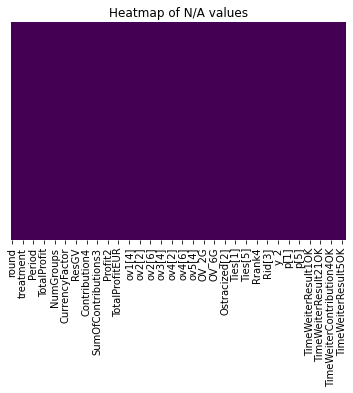

In [0]:
# Print any null values:
print(data_v.isnull().sum())

# Heatmap of N/A values:
sns.heatmap(data_v.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.title('Heatmap of N/A values')
plt.show()

From the previous section we found that there are no null values on this dataset that need to be taken care of.

So, we can proceed to the next step.

## ***Data Preprocessing & Data Visualization***

We will start by selecting the main features to start our data preprocessing and data visualization analysis. The selection is made due to the criteria used on the paper where the main characteristics were the following.

In [0]:
data_v = data_v[['Subject', 'groupid', 'treatment', 'Factor', 'EndowmentA', 'EndowmentB', 'Profit', 'TotalProfit', 'p_sum',
                'Contribution1', 'Contribution2', 'Contribution3', 'Contribution4', 'Contribution5', 'SumOfContributions1',
                'SumOfContributions2', 'SumOfContributions3', 'SumOfContributions4', 'SumOfContributions5', 'Profit1', 'Profit2', 
                'Profit3', 'Profit4', 'Profit5', 'Ostracized[1]', 'Ostracized[2]', 'Ostracized[3]', 'Ostracized[4]']]

In [0]:
data_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Subject              4600 non-null   int64  
 1   groupid              4600 non-null   int64  
 2   treatment            4600 non-null   int64  
 3   Factor               4600 non-null   float64
 4   EndowmentA           4600 non-null   int64  
 5   EndowmentB           4600 non-null   int64  
 6   Profit               4600 non-null   float64
 7   TotalProfit          4600 non-null   float64
 8   p_sum                4600 non-null   float64
 9   Contribution1        4600 non-null   int64  
 10  Contribution2        4600 non-null   int64  
 11  Contribution3        4600 non-null   int64  
 12  Contribution4        4600 non-null   int64  
 13  Contribution5        4600 non-null   int64  
 14  SumOfContributions1  4600 non-null   int64  
 15  SumOfContributions2  4600 non-null   i

We can see that all features are numeric and that there are no categorical values. That will be helpful in order to analyze the correlations between the variables, even though the features about the ID should be assigned as categorical, such as *groupid* and *subject*.

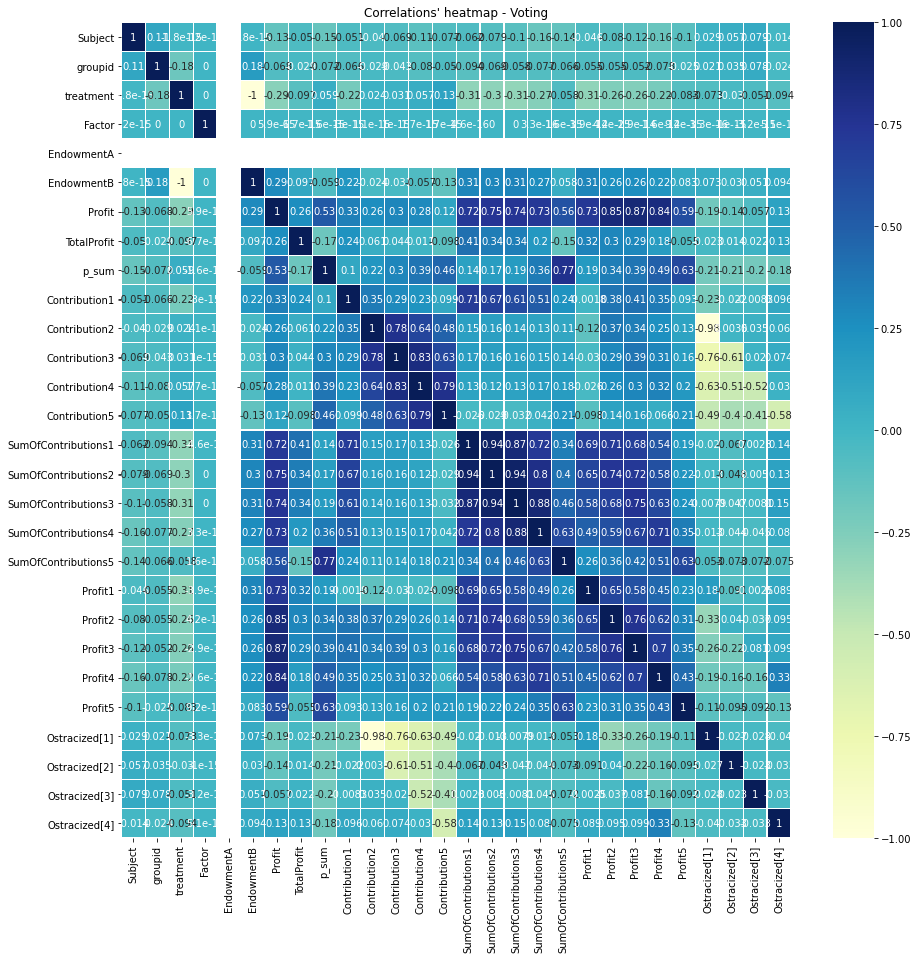

In [0]:
# Correlations' heatmap - Voting:
plt.figure(figsize=(15,15))
sns.heatmap(data_v.corr(method='pearson'),linewidths=.1,cmap="YlGnBu", annot=True)
plt.title("Correlations' heatmap - Voting")
plt.yticks(rotation=0);

From that correlations' heatmap we can see that there is a correlation beteeen some contributions and profit which is relatable to the profit equation of the Voting game. Furthermore we can see that there could also be some kind of relation between the ostracized votations and the contributions of each voting round.

Therefore, we will now study in more detal the principal features, such as ostracism and contribution/profit.

First of all we will compare the behaviour depending on the treatments 1 or 2 (choosing between *B10* and *A*, or *B8* and *A*):

In [0]:
data_v.groupby(['treatment']).aggregate([np.mean, np.var, np.sum])

Subject                    ... Ostracized[4]               
                mean        var    sum  ...          mean       var  sum
treatment                               ...                             
1          14.956522  71.028992  34400  ...      0.065217  0.060991  150
2          14.956522  71.028992  34400  ...      0.026087  0.025417   60

[2 rows x 81 columns]

We have seen that for Treatment 1 all the values are greater than on treatment 2. Contributions, profit, ostracism, they all have greater values on the treatment 1. That can be explained because players chose to play (on their majority) the *B10* game, as stated on the original paper.

In [0]:
data_v.groupby(['EndowmentA', 'EndowmentB']).aggregate([np.mean, np.var, np.sum])

Subject                    ... Ostracized[4]               
                            mean        var    sum  ...          mean       var  sum
EndowmentA EndowmentB                               ...                             
10         8           14.956522  71.028992  34400  ...      0.026087  0.025417   60
           10          14.956522  71.028992  34400  ...      0.065217  0.060991  150

[2 rows x 78 columns]

We have seen the exact same behaviour when we compare the two different endowments 10 or 8 and the kind of treatment. So, the explanation that for treatment 1 has greater values, means that when a greater amount of endowment is offered, the greater the contributions and the greater is the sum of ostracisms observed. Here we might be observing the start of the concept of fear to be voted to abandon the group and get no final profit.

Therefore, we will now proceed to analyze the *Ostracism* features:

In [0]:
data_v.groupby(['Ostracized[1]']).aggregate([np.mean, np.var, np.sum])

Subject                    ... Ostracized[4]               
                    mean        var    sum  ...          mean       var  sum
Ostracized[1]                               ...                             
0              14.911236  71.557640  66355  ...      0.047191  0.044974  210
1              16.300000  53.365772   2445  ...      0.000000  0.000000    0

[2 rows x 81 columns]

In [0]:
data_v.groupby(['Ostracized[2]']).aggregate([np.mean, np.var, np.sum])

Subject                    ... Ostracized[4]               
                    mean        var    sum  ...          mean       var  sum
Ostracized[2]                               ...                             
0              14.884444  71.495868  66980  ...      0.046667  0.044499  210
1              18.200000  38.949495   1820  ...      0.000000  0.000000    0

[2 rows x 81 columns]

In [0]:
data_v.groupby(['Ostracized[3]']).aggregate([np.mean, np.var, np.sum])

Subject                    ... Ostracized[4]               
                    mean        var    sum  ...          mean       var  sum
Ostracized[3]                               ...                             
0              14.855395  71.409881  66775  ...      0.046719  0.044546  210
1              19.285714  35.206044   2025  ...      0.000000  0.000000    0

[2 rows x 81 columns]

In [0]:
data_v.groupby(['Ostracized[4]']).aggregate([np.mean, np.var, np.sum])

Subject                    ... Ostracized[3]               
                    mean        var    sum  ...          mean       var  sum
Ostracized[4]                               ...                             
0              14.981777  70.289028  65770  ...      0.023918  0.023351  105
1              14.428571  86.274778   3030  ...      0.000000  0.000000    0

[2 rows x 81 columns]

So, as we have been able to observe on the previous aggregations, as voting rounds get passed and more individuals voting for ostracism the mean profit of the groups voting in favour of ostracism increases until it reaches its maximum. And also the subjects who vote for the exclusion contribute signifcantly more than those who vote against it, but only when the exclusion institution is actually implemented, when finally there is a majority of exclusion votes.

Feature Importance on Contributions (Vote 1 ):
Coefficient of determination: 0.11215436305456972
Feature: 0, Score: 0.78531
Feature: 1, Score: -4.62366
Feature: 2, Score: -0.78327
Feature: 3, Score: -0.58083
Feature: 4, Score: 1.01104


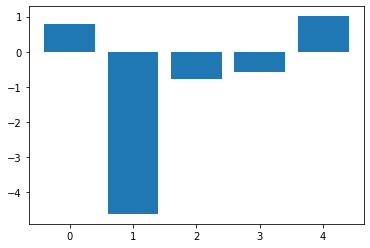

Feature Importance on Contributions (Vote 2 ):
Coefficient of determination: 0.9714890275742207
Feature: 0, Score: 0.90858
Feature: 1, Score: -106.42323
Feature: 2, Score: -3.19151
Feature: 3, Score: 0.63735
Feature: 4, Score: 1.36034


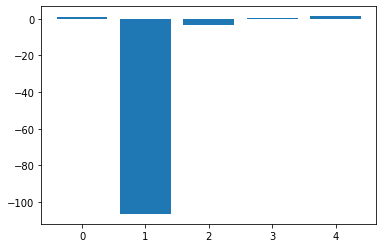

Feature Importance on Contributions (Vote 3 ):
Coefficient of determination: 0.9782658322019603
Feature: 0, Score: 1.08284
Feature: 1, Score: -105.95779
Feature: 2, Score: -105.74122
Feature: 3, Score: -2.93322
Feature: 4, Score: 1.98746


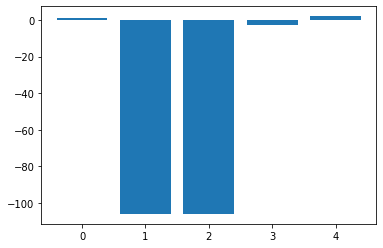

Feature Importance on Contributions (Vote 4 ):
Coefficient of determination: 0.9811899994956939
Feature: 0, Score: 1.10831
Feature: 1, Score: -105.01512
Feature: 2, Score: -104.79346
Feature: 3, Score: -104.94123
Feature: 4, Score: -4.92774


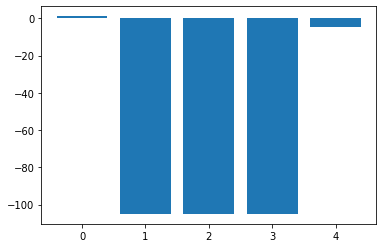

Feature Importance on Profits (Vote 1 ):
Coefficient of determination: 0.13297259590505073
Feature: 0, Score: 1.02502
Feature: 1, Score: 3.07239
Feature: 2, Score: -2.22594
Feature: 3, Score: -0.30499
Feature: 4, Score: 1.06406


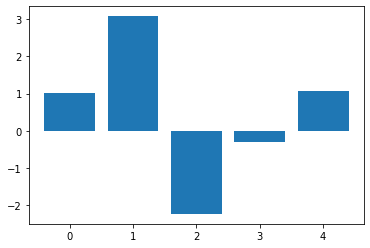

Feature Importance on Profits (Vote 2 ):
Coefficient of determination: 0.19621678372460105
Feature: 0, Score: 1.03625
Feature: 1, Score: -7.28524
Feature: 2, Score: 0.57201
Feature: 3, Score: -1.45425
Feature: 4, Score: 0.94230


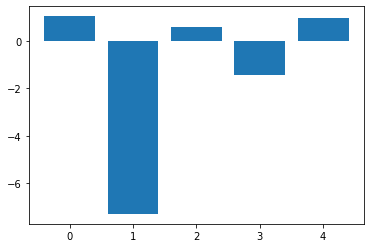

Feature Importance on Profits (Vote 3 ):
Coefficient of determination: 0.20874320770296728
Feature: 0, Score: 1.16325
Feature: 1, Score: -6.55414
Feature: 2, Score: -6.52149
Feature: 3, Score: 1.52341
Feature: 4, Score: 1.09358


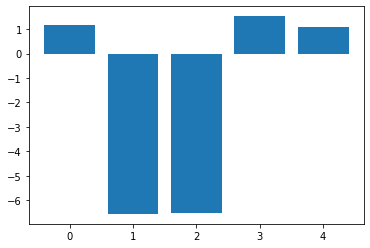

Feature Importance on Profits (Vote 4 ):
Coefficient of determination: 0.2378850933057819
Feature: 0, Score: 0.96106
Feature: 1, Score: -4.99236
Feature: 2, Score: -5.00015
Feature: 3, Score: -4.99495
Feature: 4, Score: 5.99447


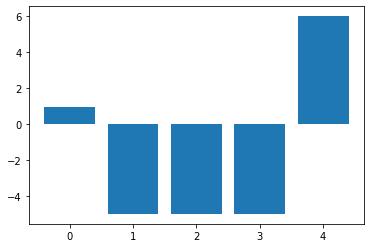

Feature Importance on Total group profit:
Coefficient of determination: 0.2378850933057819
Feature: 0, Score: 0.96106
Feature: 1, Score: -4.99236
Feature: 2, Score: -5.00015
Feature: 3, Score: -4.99495
Feature: 4, Score: 5.99447


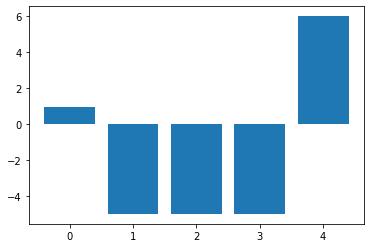

In [0]:
# Feature Importance - Linear Regression (Contributions):
from sklearn.linear_model import LinearRegression

# Voting Dataframe - Feature Importance on Player Contribution per rounds:
array = data_v.values
X = array[:,[5,24,25,26,27]] #EndowmentB, Ostracized[1], Ostracized[2], Ostracized[3], Ostracized[4]
z = [9,10,11,12] # Contributions[i]
w = 1
#y = array[:,[13,14,15,16]]
for k in z:
  y = array[:,k]
  print('Feature Importance on Contributions (Vote',+w,'):')
  # define the model
  model = LinearRegression()
  # fit the model
  model.fit(X, y)
  r_sq = model.score(X, y)
  print('Coefficient of determination:', r_sq)
  # get importance
  importance = model.coef_
  # summarize feature importance
  for i,v in enumerate(importance):
	  print('Feature: %0d, Score: %.5f' % (i,v))
  # plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()
  if k==12:
    w=1
  elif k==22:
    w=0
  else:
    w+=1

# Voting Dataframe - Feature Importance on group Profit per rounds:
array = data_v.values
X = array[:,[5,24,25,26,27]] #EndowmentB, Ostracized[1], Ostracized[2], Ostracized[3], Ostracized[4]
z = [19,20,21,22,] # Profit[i]
w = 1
#y = array[:,[13,14,15,16]]
for k in z:
  y = array[:,k]
  print('Feature Importance on Profits (Vote',+w,'):')
  # define the model
  model = LinearRegression()
  # fit the model
  model.fit(X, y)
  r_sq = model.score(X, y)
  print('Coefficient of determination:', r_sq)
  # get importance
  importance = model.coef_
  # summarize feature importance
  for i,v in enumerate(importance):
	  print('Feature: %0d, Score: %.5f' % (i,v))
  # plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()
  w+=1

# Voting Dataframe - Feature Importance on Group Profit:
array = data_v.values
X = array[:,[5,24,25,26,27]] #EndowmentB, Ostracized[1], Ostracized[2], Ostracized[3], Ostracized[4]
z = [6] # Final Group Profit
w = 1
#y = array[:,[13,14,15,16]]
y = array[:,k]
print('Feature Importance on Total group profit:')
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
  # plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From the previous analysis we have clearly seen that the linear regression states a great linear relation between the contribution and the votes of the members of the groups. We can see that the support becomes stronger over time, especially after the first voting round, when players are accustoming themselves with their group and the game becomes closer to the one in which common knowledge and a fairer contributions are made. This is related to the great proportion of the variance of the dependent variable (contribution) that can be explained with the independent variables in our regression model (*EndowmentB, Ostracized[i]*).

On the next section we will work with further analysis on the behaviour of individuals where we may be able to see that there exist different types of individuals cooperators (social players) and selfish players depending on the amount contributed and the votings made.

# ***Climate Change Dataset***

Here we start the ***EDA*** for the *Resource heterogeneity leads to unjust effort distribution in climate change mitigation* Dataset.
We may say that we only used information about on the *userround* and *user* datasets. That's because we want to stay to individual's behaviour.

## ***Data Collection***

In [0]:
# Climate Change - User:
uploaded = files.upload()
data_c = pd.read_csv(io.BytesIO(uploaded['user.csv']))

Saving user.csv to user.csv


In [0]:
# Climate Change - User round:
uploaded = files.upload()
data_cr = pd.read_csv(io.BytesIO(uploaded['userround.csv']))

Saving userround.csv to userround.csv


In [0]:
# Climate Change Dataset - Session data no relevant (because all groups achieved the final goal)
data_c.head()

,id,gender,age,study_level,prfinal1,prfinal2,prfinal3,prfinal4,prfinal5,prfinal6,prfinal7,prfinal8,prfinal9,prfinal10,prfinal11,prfinal12,prfinal13,ended,start_capital,end_capital,partida_id,prfinal14,prfinal15,winnings
0,1,d,28.0,r4,r1,r1,r4,r2,r2,r1,r1,r1,r2,r2,r4,r3,r2,1.0,40.0,12.0,1.0,r3,r2,12.0
1,2,h,45.0,r4,r1,r1,r1,r2,r3,r1,r1,r2,r2,r2,r3,r1,r2,1.0,40.0,14.0,1.0,r2,r2,14.0
2,3,h,15.0,r2,r1,r1,r2,r3,r1,r1,r2,r1,r1,r2,r3,r3,r2,1.0,40.0,28.0,1.0,r4,r4,28.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,h,24.0,r6,r1,r2,r2,r3,r3,r1,r1,r1,r3,r2,r3,r3,r2,1.0,30.0,10.0,2.0,r3,r4,10.0


In [0]:
data_c.tail()

,id,gender,age,study_level,prfinal1,prfinal2,prfinal3,prfinal4,prfinal5,prfinal6,prfinal7,prfinal8,prfinal9,prfinal10,prfinal11,prfinal12,prfinal13,ended,start_capital,end_capital,partida_id,prfinal14,prfinal15,winnings
320,321,h,29.0,r6,r1,r2,r2,r2,r3,r1,r1,r3,r2,r2,r3,r3,r2,1.0,40.0,17.0,54.0,r1,r3,17.0
321,322,h,36.0,r6,r3,r1,r2,r2,r2,r1,r1,r2,r1,r2,r3,r3,r2,1.0,40.0,25.0,54.0,r1,r2,25.0
322,323,h,27.0,r6,r3,r1,r4,r3,r3,r1,r2,r2,r3,r2,r3,r3,r2,1.0,40.0,22.0,54.0,r2,r4,22.0
323,324,h,38.0,r6,r1,r1,r4,r3,r3,r3,r2,r2,r2,r2,r1,r3,r2,1.0,40.0,17.0,54.0,r1,r4,17.0
324,325,d,32.0,r3,r1,r2,r1,r2,r2,r2,r2,r2,r3,r2,r3,r3,r2,1.0,40.0,18.0,54.0,r4,r2,18.0


In [0]:
data_cr.head()

,id,has_seleced,option_selected,timestamp,round_id,user_id
0,1,1,4,2015-12-12 11:15:47.488159,1,1
1,2,1,3,2015-12-12 11:15:40.016475,1,2
2,3,1,4,2015-12-12 11:15:41.971357,1,3
3,4,1,2,2015-12-12 11:15:40.065619,1,6
4,5,1,2,2015-12-12 11:15:39.146240,1,7


In [0]:
data_cr.tail()

,id,has_seleced,option_selected,timestamp,round_id,user_id
3235,3236,1,2,2015-12-13 15:36:48.845427,540,321
3236,3237,1,2,2015-12-13 15:36:48.883327,540,322
3237,3238,1,2,2015-12-13 15:36:48.375959,540,323
3238,3239,1,2,2015-12-13 15:36:54.295854,540,324
3239,3240,1,0,2015-12-13 15:36:49.083221,540,325


## ***Data Cleaning***

In [0]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             325 non-null    int64  
 1   gender         321 non-null    object 
 2   age            321 non-null    float64
 3   study_level    321 non-null    object 
 4   prfinal1       320 non-null    object 
 5   prfinal2       320 non-null    object 
 6   prfinal3       320 non-null    object 
 7   prfinal4       320 non-null    object 
 8   prfinal5       320 non-null    object 
 9   prfinal6       320 non-null    object 
 10  prfinal7       320 non-null    object 
 11  prfinal8       320 non-null    object 
 12  prfinal9       320 non-null    object 
 13  prfinal10      320 non-null    object 
 14  prfinal11      320 non-null    object 
 15  prfinal12      320 non-null    object 
 16  prfinal13      320 non-null    object 
 17  ended          321 non-null    float64
 18  start_capi

In [0]:
data_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3240 non-null   int64 
 1   has_seleced      3240 non-null   int64 
 2   option_selected  3240 non-null   int64 
 3   timestamp        3236 non-null   object
 4   round_id         3240 non-null   int64 
 5   user_id          3240 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 152.0+ KB


In [0]:
data_c = data_c.dropna()
data_cr = data_cr.dropna()

# All teams ended:
data_c.drop(["ended"], axis = 1, inplace = True)

## ***Data Preprocessing & Data Visualization***

In [0]:
# Maybe add the participation on each round for each participant?
data_cr.groupby(['round_id']).aggregate([np.mean, np.median, np.var])

id              has_seleced  ... option_selected user_id            
            mean  median  var        mean  ...             var    mean median  var
round_id                                   ...                                    
1            3.5     3.5  3.5           1  ...        0.800000     4.5    4.5  8.3
2            9.5     9.5  3.5           1  ...        1.466667     4.5    4.5  8.3
3           15.5    15.5  3.5           1  ...        0.700000     4.5    4.5  8.3
4           21.5    21.5  3.5           1  ...        1.600000     4.5    4.5  8.3
5           27.5    27.5  3.5           1  ...        2.566667     4.5    4.5  8.3
...          ...     ...  ...         ...  ...             ...     ...    ...  ...
536       3213.5  3213.5  3.5           1  ...        1.066667   322.5  322.5  3.5
537       3219.5  3219.5  3.5           1  ...        1.066667   322.5  322.5  3.5
538       3225.5  3225.5  3.5           1  ...        1.066667   322.5  322.5  3.5
539       3231.5  3231.5  3.5           1  ...        1.200000   322.5  322.5  3.5
540       3237.5  3237.5  3.5           1  ...        1.066667   322.5  322.5  3.5

[540 rows x 12 columns]

From the previous table we may observe a clear decrease on the *option selected*, amount to contribute when rounds are increasing.

In [0]:
data_cr.groupby(['user_id']).aggregate([np.mean, np.median, np.var])

id             has_seleced  ... option_selected round_id                 
         mean median  var        mean  ...             var     mean median       var
user_id                                ...                                          
1          28     28  330           1  ...        1.511111      5.5    5.5  9.166667
2          29     29  330           1  ...        3.377778      5.5    5.5  9.166667
3          30     30  330           1  ...        3.733333      5.5    5.5  9.166667
5          88     88  330           1  ...        2.666667     15.5   15.5  9.166667
6          31     31  330           1  ...        1.600000      5.5    5.5  9.166667
...       ...    ...  ...         ...  ...             ...      ...    ...       ...
321      3209   3209  330           1  ...        0.233333    535.5  535.5  9.166667
322      3210   3210  330           1  ...        0.277778    535.5  535.5  9.166667
323      3211   3211  330           1  ...        1.955556    535.5  535.5  9.166667
324      3212   3212  330           1  ...        0.900000    535.5  535.5  9.166667
325      3213   3213  330           1  ...        1.955556    535.5  535.5  9.166667

[324 rows x 12 columns]

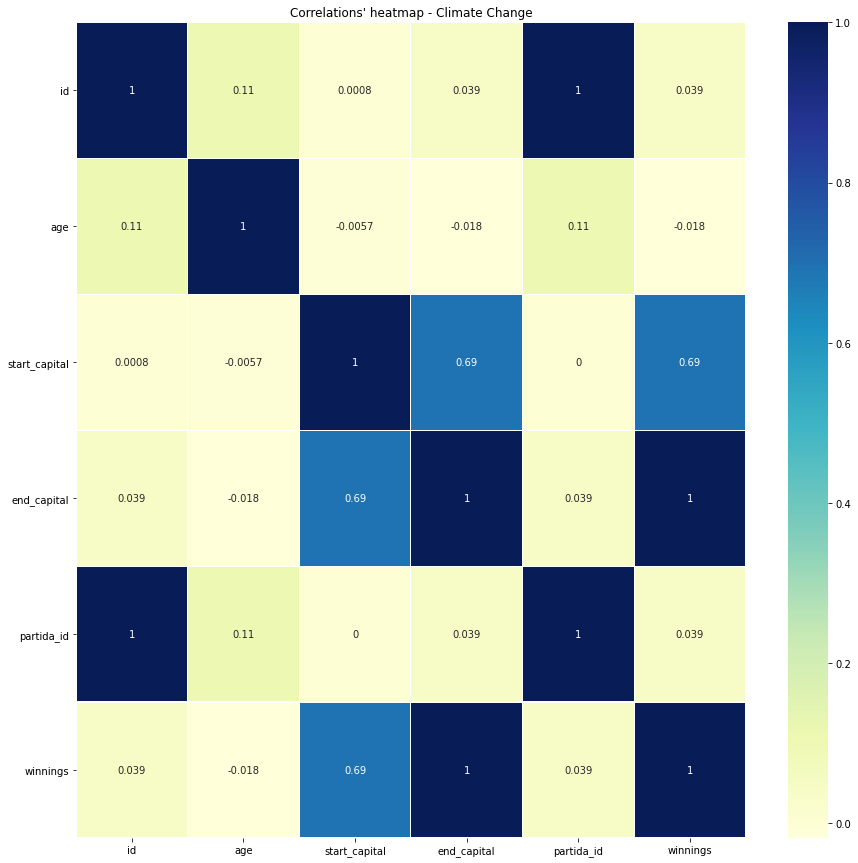

In [0]:
plt.figure(figsize=(15,15))
sns.heatmap(data_c.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.title("Correlations' heatmap - Climate Change")
plt.yticks(rotation=0);

In [0]:
data_c.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,320.0,162.66875,93.917874,1.0,81.75,161.5,244.25,325.0
age,320.0,32.28125,13.191938,11.0,24.00,30.0,41.00,73.0
start_capital,320.0,40.00000,9.199973,20.0,40.00,40.0,40.00,60.0
end_capital,320.0,18.21250,8.833101,0.0,12.00,19.0,24.00,44.0
partida_id,320.0,27.36875,15.652425,1.0,14.00,27.0,41.00,54.0
winnings,320.0,18.21250,8.833101,0.0,12.00,19.0,24.00,44.0


In [0]:
education = data_c.groupby(['study_level'])
education.aggregate([np.mean, np.median, np.var])

id                       ...   winnings                   
                   mean median           var  ...       mean median         var
study_level                                   ...                              
r1           235.000000    235           NaN  ...  18.000000   18.0         NaN
r2           156.457143    205  11315.608403  ...  17.314286   17.0   65.280672
r3           145.459459    131  10419.977477  ...  19.837838   20.0   95.917417
r4           167.684211    185  10165.681366  ...  19.026316   19.0   71.161451
r5           170.396226    181   8141.359216  ...  16.547170   16.0  112.098694
r6           164.398693    156   8010.083419  ...  18.339869   20.0   66.620571
r7           135.000000    135   6241.000000  ...  21.333333   24.0  149.333333

[7 rows x 18 columns]

As we may see on the previous aggregation, we cannot infer a direct relation between the winnings and the study levels, because the group of participants with the higher level of sudies also has the greater amount of starting capital.

We may now aggregate the information about each round of each player, because we have seen that the amount contributed varies severly depending on the round.

In [0]:
data_c.rename(columns={'id':'user_id'}, inplace=True)
#data_c_total = pd.merge(data_cr, data_c, how='left', on=['user_id'])

In [0]:
data_c_merge = pd.merge(data_cr, data_c, how='left', on=['user_id'])

In [0]:
data_c_total = data_c_merge.dropna()
data_c_total.head(5)

,id,has_seleced,option_selected,timestamp,round_id,user_id,gender,age,study_level,prfinal1,prfinal2,prfinal3,prfinal4,prfinal5,prfinal6,prfinal7,prfinal8,prfinal9,prfinal10,prfinal11,prfinal12,prfinal13,start_capital,end_capital,partida_id,prfinal14,prfinal15,winnings
0,1,1,4,2015-12-12 11:15:47.488159,1,1,d,28.0,r4,r1,r1,r4,r2,r2,r1,r1,r1,r2,r2,r4,r3,r2,40.0,12.0,1.0,r3,r2,12.0
1,2,1,3,2015-12-12 11:15:40.016475,1,2,h,45.0,r4,r1,r1,r1,r2,r3,r1,r1,r2,r2,r2,r3,r1,r2,40.0,14.0,1.0,r2,r2,14.0
2,3,1,4,2015-12-12 11:15:41.971357,1,3,h,15.0,r2,r1,r1,r2,r3,r1,r1,r2,r1,r1,r2,r3,r3,r2,40.0,28.0,1.0,r4,r4,28.0
3,4,1,2,2015-12-12 11:15:40.065619,1,6,d,14.0,r2,r1,r2,r2,r3,r3,r1,r3,r1,r2,r2,r3,r3,r3,40.0,16.0,1.0,r1,r3,16.0
4,5,1,2,2015-12-12 11:15:39.146240,1,7,h,14.0,r2,r1,r2,r2,r3,r3,r1,r2,r1,r1,r2,r3,r3,r1,40.0,26.0,1.0,r3,r4,26.0


We may now study the main characteristics of the aggregation of the amount contributed for each individual during all the rounds.

In [0]:
option = data_c_total.groupby(['option_selected'])
option.aggregate([np.mean, np.median, np.var, np.sum])

id                        ... winnings                    
                        mean median            var  ...   median        var      sum
option_selected                                     ...                             
0                1800.095611   1921  841655.898222  ...     20.0  70.542256  12950.0
1                 942.436823    883  431051.341103  ...     20.0  95.611940   5066.0
2                1830.343482   1966  832960.545717  ...     20.0  71.774506  20065.0
3                 884.400000    879  367375.851327  ...     17.0  74.399132   5974.0
4                1708.106383   1805  868560.956159  ...     16.0  76.538739  14225.0

[5 rows x 36 columns]

As we may see, the option most selected was 2, which makes sense being the mean vale of contribution options. However, the amount contributed most selected for the players with a greater starting capital was proportional to the amount contributed.

Next we will study the education level of the participants with the novel feature of the contribution on each round.

In [0]:
education_total = data_c_total.groupby(['study_level'])
education_total.aggregate([np.mean, np.median, np.var, np.sum])

id                        ... winnings                     
                    mean  median           var  ...   median         var      sum
study_level                                     ...                              
r1           2369.000000  2369.0  3.300000e+02  ...     18.0    0.000000    180.0
r2           1543.000000  2013.0  1.106937e+06  ...     17.0   63.597217   6060.0
r3           1438.189189  1291.0  1.016408e+06  ...     20.0   93.577968   7340.0
r4           1667.500000  1859.0  9.887206e+05  ...     19.0   69.471601   7230.0
r5           1691.113208  1757.5  8.004250e+05  ...     16.0  110.191533   8770.0
r6           1630.452583  1543.0  7.962834e+05  ...     20.0   66.051503  28060.0
r7           1349.000000  1349.0  4.209700e+05  ...     24.0  102.988506    640.0

[7 rows x 40 columns]

As we can see the variation of the amount contributed for each study level is on the confidence interval of 99%. So there is no aparent relation between both features.

We may now study the feature importance with the feature selection methods that are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

We will focus on the *option_selected* and the features that are the most important on predicting the contribution's output.

We will then start with the categorical variable *study level* and continue with the winnings and contributions.

In [0]:
# Feature Selection - ExtraTreesClassifier:
from sklearn.ensemble import ExtraTreesClassifier
# load data
array = data_c_total.values
X = array[:,[2,4,7,22,23,27]] # contribution, round_id, age, start_capital, end_capital, winnings 
y = array[:,8] # study_level
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
print(model.feature_importances_)

Coefficient of determination: 1.0
[0.01254352 0.23128779 0.38713121 0.07156321 0.14395969 0.15351457]


From the above result, whom may see that with a coefficient of determination of 1.0, the independent variables account for the 100% of the variance of the dependent variable (*study level*) because age is proportional to that.

We will now focus our study on the group winnings and individual contributions.

Coefficient of determination: 0.24145187382164912
Feature: 0, Score: -0.00006
Feature: 1, Score: 0.00014
Feature: 2, Score: 0.09990
Feature: 3, Score: -0.04998
Feature: 4, Score: -0.04998


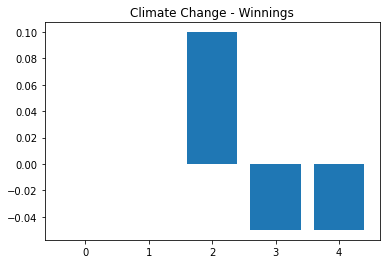

In [0]:
# Feature Importance - Linear Regression (Winnings):
from sklearn.linear_model import LinearRegression
# Voting data - Winnings:
array = data_c_total.values
X = array[:,[4,7,22,23,27]] # round_id, age, start_capital, end_capital, winnings
y = array[:,2] # Winnings
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Climate Change - Winnings')
plt.show()

From this feature importance analysis with the fit of a linear regression, we may see that the *starting capital* is the feature that has a greater influence on the individual contribution, as it was stated on the original paper. However there is a 76% of the variability of the dependent variable (*winnings*) that is still unaccounted for.

For that reason we will base our study on the contribution on each round rather thatn focusing on the winnings.

In [0]:
data_c_total.groupby(['start_capital']).aggregate([np.mean, np.median, np.var])

id                         ...   winnings                  
                      mean  median            var  ...       mean median        var
start_capital                                      ...                             
20.0           1629.895911  1655.0  874254.414498  ...   5.724907    5.0  29.938967
30.0           1628.333333  1650.0  871494.386617  ...   9.925926   10.0  57.987058
40.0           1604.665094  1580.5  885749.604633  ...  18.400943   19.0  38.975554
50.0           1628.481481  1649.0  869426.384414  ...  23.740741   24.0  46.438111
60.0           1628.037037  1651.0  870593.455872  ...  32.000000   33.0  36.133829

[5 rows x 27 columns]

Related to what we were stating before and as said on the original paper, we may see now that *disadvantaged individuals* (lower starting capital) are contributing much more than a fair share of the mitigation, and that the *richest ones* are contributing less.

With this information we may now create a new variable that will acccount on the proportion of the amount contributed/starting capital.

In [0]:
data_c_total['contribution_scaled'] = (data_c_total['option_selected']/data_c_total['start_capital'])*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


If we now analyze the same aggregation than before, we may clearly see what we were stating before. That *disadvantaged individuals* (lower starting capital) are contributing much more than a fair share of the mitigation, and that the *richest ones* are contributing way less (from 7.15 on *disadvantaged individuals* to 4.66 on *rich individuals*).

In [0]:
data_c_total.groupby(['start_capital']).aggregate([np.mean, np.median, np.var])

id          ... contribution_scaled           
                      mean  median  ...              median        var
start_capital                       ...                               
20.0           1629.895911  1655.0  ...            5.000000  40.856128
30.0           1628.333333  1650.0  ...            6.666667  24.865146
40.0           1604.665094  1580.5  ...            5.000000  12.596720
50.0           1628.481481  1649.0  ...            6.000000   8.226298
60.0           1628.037037  1651.0  ...            5.000000   4.721190

[5 rows x 30 columns]

# **Machine Learning Models**

For each dataset:

1.   Preprocessing Datasets
2.   Unsupervised ML Models
3.   Supervised ML Models
4.   Explainability libraries


## *Large scale and information effects on cooperation in public good games* Dataset

### Preprocessing Datasets - (Pipeline)

First of all, we will have to preprocess the final datasets from the previous section in order to be able to get all the information of each participant in a row, treating every row of the dataset as a participant.

We will create the functions to implement the correct pipeline on the Preprocessing step.

In [321]:
# Large size and information effects:
uploaded = files.upload()
data_li = pd.read_csv(io.BytesIO(uploaded['2017A2ECOCOOPANSA01ONL0000ESPMAD.csv']))

Saving 2017A2ECOCOOPANSA01ONL0000ESPMAD.csv to 2017A2ECOCOOPANSA01ONL0000ESPMAD (17).csv


In [0]:
data_li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21195 entries, 0 to 21194
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          21112 non-null  float64
 1   player_alive            21112 non-null  float64
 2   group_avg_contribution  21112 non-null  float64
 3   player_contribution     21112 non-null  float64
 4   round_number            21112 non-null  float64
 5   gender                  20874 non-null  object 
 6   age                     20874 non-null  float64
 7   treatment               21112 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.3+ MB


In [0]:
# Functions for L&I pipeline:
n_participants = 1508
def new_dataframe():  # Creation of the empty new final dataframe
  df = np.array([np.arange(n_participants)]*32).T
  columns=['participant_id', 'gender', 'age', 'treatment', 'group_avg_1', 'group_avg_2', 'group_avg_3',
                              'group_avg_4', 'group_avg_5', 'group_avg_6', 'group_avg_7', 'group_avg_8', 'group_avg_9', 
                              'group_avg_10', 'group_avg_11', 'group_avg_12', 'group_avg_13', 'group_avg_14', 'p_cont_1', 
                              'p_cont_2', 'p_cont_3', 'p_cont_4', 'p_cont_5', 'p_cont_6', 'p_cont_7', 'p_cont_8', 'p_cont_9', 
                              'p_cont_10', 'p_cont_11', 'p_cont_12', 'p_cont_13', 'p_cont_14']
  df_li = pd.DataFrame(df, columns=columns)
  return df_li

def preprocessing(data): # Sorting of the values and posterior fulfillment of the final empty dataframe
  non_null_values = 21112
  n_rounds = 14
  data = data.sort_values(["participant_id", "treatment",  'round_number', "group_avg_contribution"]
                                              , ascending = (True, True, True, True))
  # Treatment:
  df_li = new_dataframe() # Function to create the empty dataframe
  j=0 # number of players (iterative value)
  for i in range(non_null_values): #non-null values
    if i < (non_null_values-(n_rounds-1)):
      if (i/n_rounds == round(i/n_rounds)):
        df_li['participant_id'].iloc[j] = data['participant_id'].iloc[i]
        df_li['gender'].iloc[j] = data['gender'].iloc[i]
        df_li['age'].iloc[j] = data['age'].iloc[i]
        df_li['treatment'].iloc[j] = data['treatment'].iloc[i]
        k=0 # number of rounds (iterative value)
        for w in range(4, 18): # locations of the avg columns in the new dataframe df_li
          df_li.iloc[j, w] = data['group_avg_contribution'].iloc[i+k]
          k+=1
        k=0 # number of rounds (iterative value)
        for z in range(18, 32): # locations of the contributions in the new dataframe df_li
          df_li.iloc[j, z] = data['player_contribution'].iloc[i+k]
          k+=1
        j+=1
    else:
      break
  return df_li 

def categorical(data): # Create dummy variables for the Treatment column and rearange the shape of dataframe
  df_li = preprocessing(data)
  dummy = pd.get_dummies(df_li['treatment'])
  df_li = pd.concat([df_li, dummy], axis=1)
  df_li = df_li.drop(df_li.iloc[:,32:-6], axis=1)
  return df_li

def clean_df(data):
  data_final = categorical(data)
  data_final["age"].fillna("No info", inplace = True)
  df = np.array([np.arange(n_participants)]*1).T
  df1 = pd.DataFrame(df, columns=['N_Participant'])
  data_final = pd.concat([df1, data_final], axis=1)
  return data_final

In [323]:
# Printing the 10 first rows of the final dataframe:
df_li = clean_df(data_li)
df_li.head(10)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,N_Participant,participant_id,gender,age,treatment,group_avg_1,group_avg_2,group_avg_3,group_avg_4,group_avg_5,group_avg_6,group_avg_7,group_avg_8,group_avg_9,group_avg_10,group_avg_11,group_avg_12,group_avg_13,group_avg_14,p_cont_1,p_cont_2,p_cont_3,p_cont_4,p_cont_5,p_cont_6,p_cont_7,p_cont_8,p_cont_9,p_cont_10,p_cont_11,p_cont_12,p_cont_13,p_cont_14,PGG100,PGG1000,PGG_H,PGG_H2,PGG_HM,PGG_HM2
0,0,1.0,F,32,PGG100,4.7800,5.3600,5.3400,5.0500,4.9100,4.7100,4.6700,4.6000,4.3400,4.3200,4.3500,4.4400,4.5100,4.5300,6.0,4.0,6.0,4.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1,0,0,0,0,0
1,1,1.0,M,52,PGG1000,4.5300,5.4100,5.5400,5.2000,4.8100,4.7200,4.6700,4.7600,4.7400,4.4100,4.3300,4.3500,4.1800,4.2500,4.0,2.0,2.0,2.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
2,2,1.0,F,32,PGG_H,4.5833,5.5100,5.8100,6.0100,6.1500,6.7100,6.6500,7.2000,6.7800,6.0000,5.8500,5.6700,5.7600,5.4362,6.0,6.0,4.0,6.0,6.0,6.0,6.0,10.0,10.0,8.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
3,3,1.0,F,32,PGG_H2,4.4000,4.8250,5.4500,5.3125,5.7500,5.3291,5.1923,5.1923,5.7179,6.2564,6.2308,6.2436,5.2179,4.6538,6.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,10.0,10.0,10.0,10.0,6.0,0,0,0,1,0,0
4,4,1.0,F,32,PGG_HM,4.6136,5.8200,6.3000,6.3900,6.3400,6.3200,6.1800,6.5300,6.5500,6.4000,5.9100,6.0600,5.9400,5.8824,6.0,4.0,6.0,6.0,8.0,6.0,8.0,6.0,8.0,8.0,0.0,10.0,0.0,0.0,0,0,0,0,1,0
5,5,1.0,F,32,PGG_HM2,5.0732,5.6585,5.8537,5.4634,5.2927,5.5000,5.4878,5.4268,4.7683,4.4756,4.6951,4.9024,4.8875,4.2911,6.0,4.0,6.0,6.0,8.0,10.0,10.0,10.0,8.0,8.0,0.0,0.0,4.0,6.0,0,0,0,0,0,1
6,6,2.0,M,19,PGG100,4.7800,5.3600,5.3400,5.0500,4.9100,4.7100,4.6700,4.6000,4.3400,4.3200,4.3500,4.4400,4.5100,4.5300,6.0,8.0,8.0,8.0,4.0,6.0,10.0,8.0,6.0,8.0,8.0,6.0,8.0,8.0,1,0,0,0,0,0
7,7,2.0,M,34,PGG1000,4.5300,5.4100,5.5400,5.2000,4.8100,4.7200,4.6700,4.7600,4.7400,4.4100,4.3300,4.3500,4.1800,4.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0
8,8,2.0,F,40,PGG_H,4.5833,5.5100,5.8100,6.0100,6.1500,6.7100,6.6500,7.2000,6.7800,6.0000,5.8500,5.6700,5.7600,5.4362,0.0,2.0,2.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0,0,1,0,0,0
9,9,2.0,F,27,PGG_H2,4.4000,4.8250,5.4500,5.3125,5.7500,5.3291,5.1923,5.1923,5.7179,6.2564,6.2308,6.2436,5.2179,4.6538,2.0,4.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0,0,0,1,0,0


### Unsupervised ML Models


So, here we will focus on the features that are more relevant related to cluster the behaviour of individuals on the PGG.


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


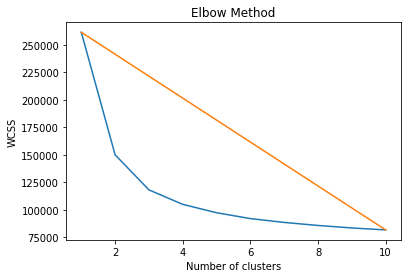

In [324]:
# L&I nº of clusters:
from sklearn.cluster import KMeans
# Loop for each type of Game (Or focus on the ones that we previously said)
df_li = clean_df(data_li) # call the previous function with the pipeline set
X_cluster = df_li.iloc[:,5:38].values # Round group contributions, round ind contributions & information
#X_cluster = df_li.iloc[:,18:37].values # Round individual contributions & information
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.plot([1, 10],[wcss[0], wcss[-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the optimal nº of clusters is 3, because the length from the point X=3 to the plotted line is the greatest of all X values.

In [0]:
# Running the KMeans algorithm with the optimal number of clusters:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
y_kmeans = kmeans.fit_predict(X_cluster)
# Adding the Cluster column to the final dataframe:
cluster = pd.DataFrame(y_kmeans, columns=['Cluster'])
df_li_cluster = pd.concat([df_li, cluster], axis=1)

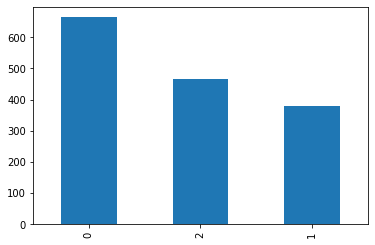

In [326]:
# Histogram for the count of participants on each cluster:
df_li_cluster['Cluster'] = df_li_cluster['Cluster'].astype('category')
df_li_cluster['Cluster'].value_counts().plot(kind='bar')

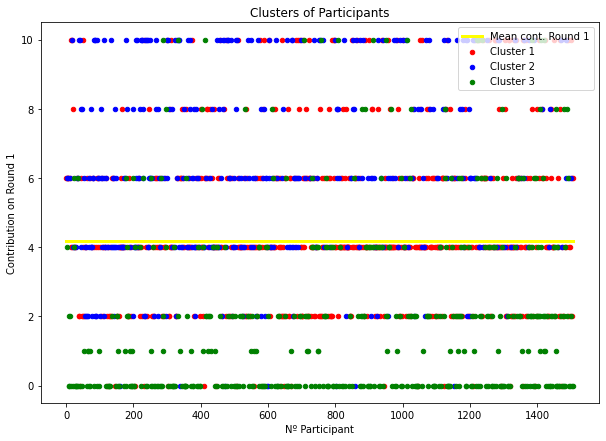

In [327]:
# Visualizing the clusters:
plt.figure(figsize=(10,7))
plt.scatter(df_li_cluster[df_li_cluster['Cluster']==0].iloc[:,0], 
            df_li_cluster[df_li_cluster['Cluster']==0].iloc[:,19], s=20, c='red', label ='Cluster 1')
plt.scatter(df_li_cluster[df_li_cluster['Cluster']==1].iloc[:,0], 
            df_li_cluster[df_li_cluster['Cluster']==1].iloc[:,19], s=20, c='blue', label ='Cluster 2')
plt.scatter(df_li_cluster[df_li_cluster['Cluster']==2].iloc[:,0], 
            df_li_cluster[df_li_cluster['Cluster']==2].iloc[:,19], s=20, c='green', label ='Cluster 3')
# Mean value:
plt.plot([0, n_participants],[df_li_cluster['p_cont_1'].mean()
, df_li_cluster['p_cont_1'].mean()], linewidth=3, c='yellow', label='Mean cont. Round 1')
plt.title('Clusters of Participants')
plt.xlabel('Nº Participant')
plt.ylabel('Contribution on Round 1')
plt.legend(loc='upper right')
plt.show()

In [0]:
#!pip install shap
from sklearn.model_selection import train_test_split
# Only round Individual Contributions + Information:
X_train, X_test, y_train, y_test = train_test_split(df_li_cluster.iloc[:, 19:39]
                                                    , df_li_cluster.iloc[:, 39]
                                                    , test_size=0.1, random_state=42)

In [390]:
# Random Forest Classifier
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rforest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print("Accuracy:",metrics.accuracy_score(y_test, rforest.predict(X_test)))

# SHAP explain all the predictions in the test set:
explainer = shap.KernelExplainer(rforest.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

Using 1357 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Accuracy: 0.9602649006622517


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


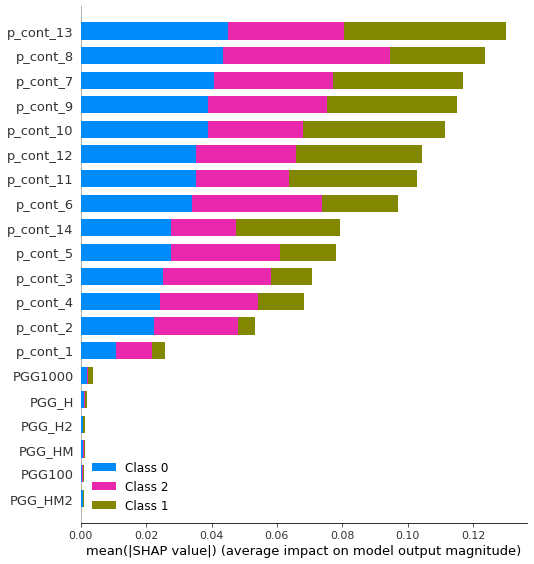

In [392]:
# Mean absolute value of the SHAP values for each feature:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [365]:
# Multi Layer Perceptron Classifier (MPLC) - Neural Network:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, y_train)
print("Accuracy:",metrics.accuracy_score(y_test, nn.predict(X_test)))

# SHAP explain all the predictions in the test set:
# Use Kernel SHAP to explain test set predictions:
explainer = shap.KernelExplainer(nn.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test)
"""
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, matplotlib=True)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)"""

Using 1506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Accuracy: 1.0


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


Exception: ignored

In [0]:
# Mean absolute value of the SHAP values for each feature:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### *Resource heterogeneity leads to unjust effort distribution in climate change mitigation* Dataset

First of all, we will have to preprocess the final dataset from the previous *Climate Change Dataset* section in order to be able to get all the information of each participant in a row, treating every row of the dataset as a participant.

In [0]:
data_c_merge = data_c_merge.sort_values(["user_id", 'round_id'], ascending = (True, True))
data_c_merge.head(5)

,id,has_seleced,option_selected,timestamp,round_id,user_id,gender,age,study_level,prfinal1,prfinal2,prfinal3,prfinal4,prfinal5,prfinal6,prfinal7,prfinal8,prfinal9,prfinal10,prfinal11,prfinal12,prfinal13,start_capital,end_capital,partida_id,prfinal14,prfinal15,winnings
0,1,1,4,2015-12-12 11:15:47.488159,1,1,d,28.0,r4,r1,r1,r4,r2,r2,r1,r1,r1,r2,r2,r4,r3,r2,40.0,12.0,1.0,r3,r2,12.0
6,7,1,3,2015-12-12 11:16:13.472208,2,1,d,28.0,r4,r1,r1,r4,r2,r2,r1,r1,r1,r2,r2,r4,r3,r2,40.0,12.0,1.0,r3,r2,12.0
12,13,1,4,2015-12-12 11:16:32.297398,3,1,d,28.0,r4,r1,r1,r4,r2,r2,r1,r1,r1,r2,r2,r4,r3,r2,40.0,12.0,1.0,r3,r2,12.0
18,19,1,3,2015-12-12 11:17:07.843896,4,1,d,28.0,r4,r1,r1,r4,r2,r2,r1,r1,r1,r2,r2,r4,r3,r2,40.0,12.0,1.0,r3,r2,12.0
24,25,1,2,2015-12-12 11:17:29.858214,5,1,d,28.0,r4,r1,r1,r4,r2,r2,r1,r1,r1,r2,r2,r4,r3,r2,40.0,12.0,1.0,r3,r2,12.0


In [0]:
# Climate Change Dataframe: 
df_cc = pd.DataFrame(columns=['user_id', 'gender', 'age', 'study_level', 'start_capital', 'p_cont_1', 'p_cont_2', 'p_cont_3', 
                              'p_cont_4', 'p_cont_5', 'p_cont_6', 'p_cont_7', 'p_cont_8', 'p_cont_9', 'p_cont_10', 'end_capital',
                              'winnings'])

data = np.array([np.arange(12040)]*17).T # LENGTH
columns=['user_id', 'gender', 'age', 'study_level', 'start_capital', 'p_cont_1', 'p_cont_2', 'p_cont_3', 
                              'p_cont_4', 'p_cont_5', 'p_cont_6', 'p_cont_7', 'p_cont_8', 'p_cont_9', 'p_cont_10', 'end_capital',
                              'winnings']

df_cc = pd.DataFrame(data, columns=columns)

df_cc.head()

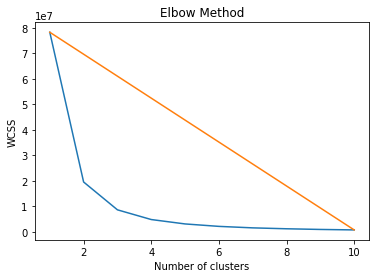

In [0]:
# Climate Change:
from sklearn.cluster import KMeans
#X_cluster = array[:,[2,3]]
X_cluster = data_c_total[['contribution_scaled', 'round_id']].values
#X_cluster = data_li[['round_number', 'player_contribution']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.plot([1, 10],[wcss[0], wcss[-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
#X_cluster = data_li[['round_number', 'player_contribution']].values
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_cluster)

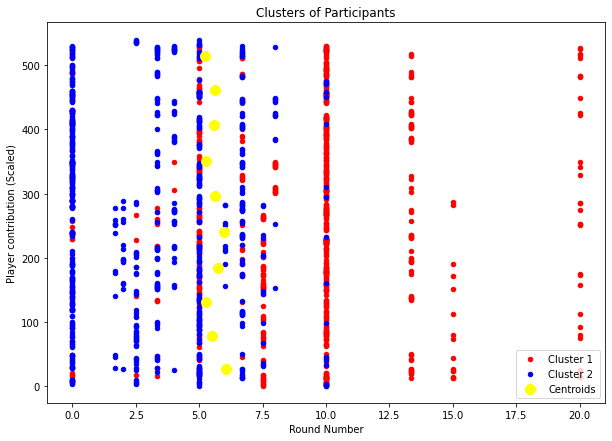

In [0]:
# Visualizing the clusters:
plt.figure(figsize=(10,7))
plt.scatter(X_cluster[y_kmeans==0, 0], X_cluster[y_kmeans==0, 1], s=20, c='red', label ='Cluster 1')
plt.scatter(X_cluster[y_kmeans==1, 0], X_cluster[y_kmeans==1, 1], s=20, c='blue', label ='Cluster 2')
# Plot the centroids. This time we're going to use the cluster centres:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of Participants')
plt.xlabel('Round Number')
plt.ylabel('Player contribution (Scaled)')
plt.legend()
plt.show()

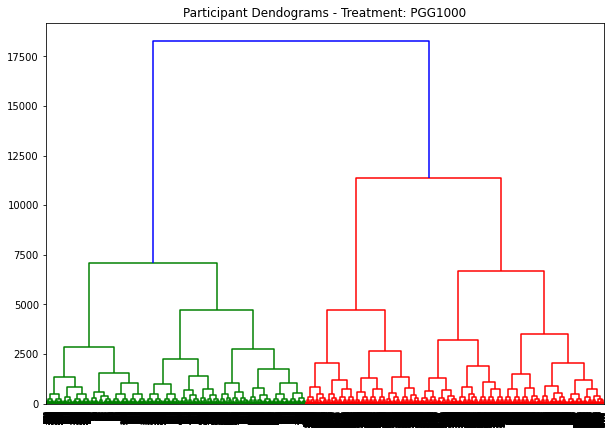

In [0]:
# Hierarchical Clustering - Euclidian distance:
# Separate for the type of Treatment:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as shc

# Dendogram applying Dynamic Time Wrapping:
X_cluster = data_100[['player_contribution']].values
y = data_100[['round_number']].values
distance, path = fastdtw(X_cluster, y, dist=euclidean)
plt.figure(figsize=(10, 7))
plt.title("Participant Dendograms - Treatment: PGG1000")
dend = shc.dendrogram(shc.linkage(path, method='complete', metric='euclidean'))

From both methods we found that the best number of k clusters is k=3.

In [0]:
#X_cluster = data_li[['round_number', 'player_contribution']].values
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_cluster)

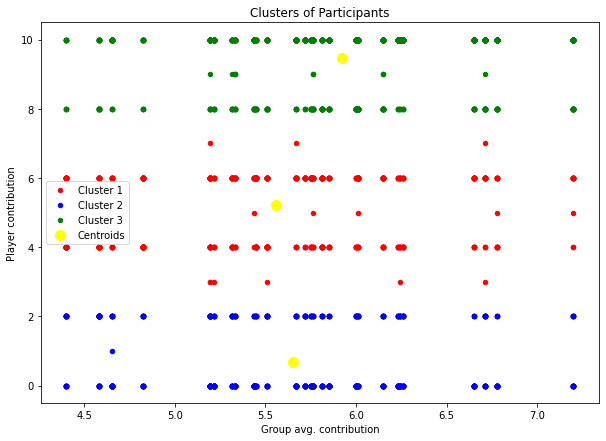

In [0]:
# Visualizing the clusters:
plt.figure(figsize=(10,7))
plt.scatter(X_cluster[y_kmeans==0, 0], X_cluster[y_kmeans==0, 1], s=20, c='red', label ='Cluster 1')
plt.scatter(X_cluster[y_kmeans==1, 0], X_cluster[y_kmeans==1, 1], s=20, c='blue', label ='Cluster 2')
plt.scatter(X_cluster[y_kmeans==2, 0], X_cluster[y_kmeans==2, 1], s=20, c='green', label ='Cluster 3')
# Plot the centroids. This time we're going to use the cluster centres:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of Participants')
plt.xlabel('Group avg. contribution')
plt.ylabel('Player contribution')
plt.legend()
plt.show()

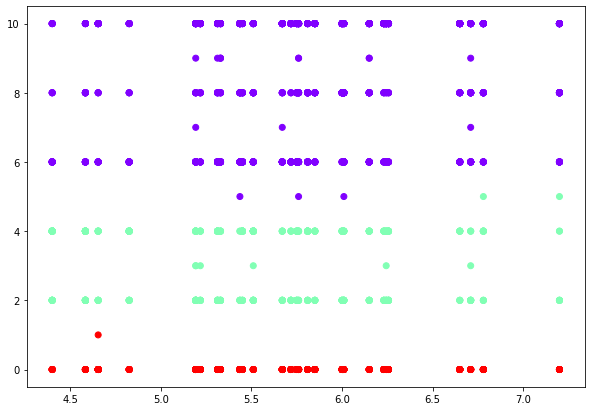

In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(X_cluster)
plt.figure(figsize=(10, 7))
plt.scatter(X_cluster[:,0],X_cluster[:,1], c=cluster.labels_, cmap='rainbow')

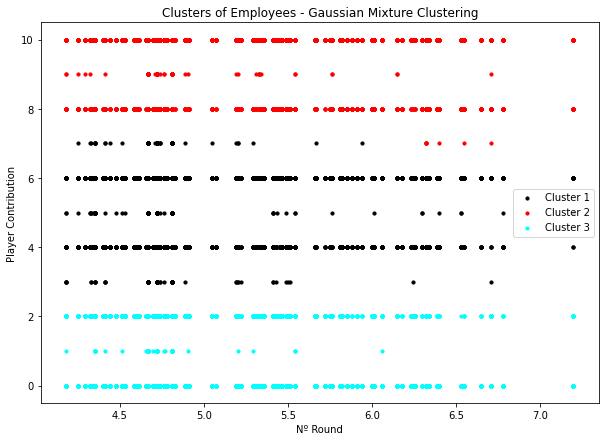

In [0]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
#X = df[['Reimbursement_Value', 'Reimbursement_Value_Report']].values
X = data_li[['group_avg_contribution', 'player_contribution']].values
# define the model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
# show the plot
plt.figure(figsize=(10,7))
plt.scatter(X[yhat==0, 0], X[yhat==0, 1], s=10, c='black', label ='Cluster 1')
plt.scatter(X[yhat==1, 0], X[yhat==1, 1], s=10, c='red', label ='Cluster 2')
plt.scatter(X[yhat==2, 0], X[yhat==2, 1], s=10, c='cyan', label ='Cluster 3')
plt.title('Clusters of Employees - Gaussian Mixture Clustering')
plt.xlabel('Group average contribution')
plt.ylabel('Player Contribution')
plt.legend()
plt.show()